#  The Art of Demand-Based Pricing Optimization: A Revenue Management Approach

During my hospitality studies, I did not have a clear idea of where to take my career. Fortunately, the university provided 3 internships opportunity for us to find out what resonated the most with us. My first internship was in a hotel restaurant, where I got acquainted with the hotel revenue manager. 

He will come after work to the restaurant for dinner, and I would always try to be the person who served him. At that time, I did not even know of the existence of this department, but I would listen with intrigue to his stories and work. Little did I know then that these seemingly ordinary interactions would seed the roots of a profound fascination with the world of Revenue Management and shape my career.

After graduating, I managed to land an internship with the revenue management department. After over 8 years in the industry, I remember how things I take for granted and as common sense today were mindblowing learnings during that internship.

One of my favorite aspects of the training was discussing the pricing strategy with the revenue manager. After running the morning reports, I would sit with her to discuss the trends, and she would regularly ask me what I thought we should do. 

In this hotel, as with most, Sunday was the slowest day, and one day she asked me what I thought we should do with the Sunday's pricing. Apart from some lectures we had during my studies, I did not know anything about pricing. Needless to say, I was pretty naïve, so I said we could reduce the price on Sunday to capture more demand. 

What the revenue manager taught me after this, is a lesson that I carry with me to this day. The revenue manager looked at me and said, "That will only make things worse." As we looked at the revenue management system recommendations, I noticed the system-recommended price was the current price we had set up. She explained that overall demand for Sundays is low, and a price decrease might increase the volume of business. Still, it won't be enough to make up for lost revenue. The current price was optimal based on the consumer response model for Sundays.

This interaction opened my mind to explore the field of demand-based pricing optimization.

# What is Revenue Management

The initial story echoes some of the daily pricing complexities that hotels and many other businesses face. 
Unlike many other industries, hotels cannot increase or decrease supply to accommodate demand. Therefore, the hotel team is faced with a question.

>What price should I charge for my available supply?

**Making the wrong decision could be very costly.**

This is where Revenue management comes into place. Revenue management is a business approach to balance supply and demand to maximize revenue. This might sound complicated, but it essentially provides a strategic answer to the above problem. Revenue managers have two strategic levers they can use to optimize revenue:

- **Capacity control**: How many rooms to allocate to each segment
- **Pricing**: What price to charge for each segment
    
The beforementioned story highlights a problem that can be solved using the Revenue management pricing lever. Using pricing models, the revenue manager can estimate the optimal pricing for the available supply.

This workbook will explore the concept and math behind demand-based price modeling and optimal pricing.

# Why Price modeling is important

According to research by Skift, 16.3% of hotels worldwide use sophisticated revenue management technology that goes beyond Excel spreadsheets, heuristics and gut feeling (skift,2019).

If your hotel uses a sophisticated revenue management, this notebook will show you the key concepts your system is using. Knowing these concepts is paramount to interact with the system and explain system recommendation to your team.

If your hotel is one of the many that does not have a revenue management system, this workbook will provide you a simple model, that you can use as a baseline to making better pricing decisions.

# Price Modeling and Optimal pricing

Thinking back to the initial story, how could we have answered our Sunday pricing problem better?
It would have been great to estimate how many booking we could have got by dropping the rate or increasing the rate.

Fundamentally we are trying to answer the question:
 >On Sundays, How many rooms can I sell at each price point?
 
One way of answering this would be by looking at historical transactions and counting how many times we saw each price point. 
Let's say we went ahead and counted, and found that on Sundays we have historically seen:

- 3 guest that paid 200
- 2 guest that paid 250
- 2 guest that paid 300
- 1 guest that paid 400

Could we say that the demand at 200 is 3 rooms? 

If we think about it, we are looking at demand for only one time period; at any moment in time, there would be one price available for that arrival day; for example, 90 days out, the price might have been 200 and 10 days out the price might have been 400. This means that when the guest who paid 400 made the booking, the 200 offer was unavailable. 

Why does this matter? It matters because, **as guests are only  exposed to a specific rate, we need to make one key assumption**:

> **Customers who paid a higher price would have paid  a lower price if it had been available.**

This key assumption aligns with the concept of consumer surplus in economics. Consumer surplus represents the difference between what consumers are willing to pay for a good or service and what they actually pay. When consumers pay a price lower than what they are willing to pay, they experience consumer surplus.

Now we know how to count demand at each price point. But are we able to answer our question?
One shortfall in counting historical data is that we do not have the full range of possible prices.

To get access to the full price spectrum, we will need to create a price model.

Price modeling  answers the question:if I charge X , how many rooms will I sell? The price model will represent the relationship between a hotel's price and demand.

In the next part of the workbook, we will create Price model and explore how we could use it to estimate the optimal price for a hotel.

Typically fully deployed pricing model account for factors such as overall market demand, seasonality, competitors' pricing, Length of stay, lead times, and a myriad of other factors. As the goal of this workbook is for us to understand how price modeling and optimization work, we will focus only on seasonality and overall market demand driven by holidays.

The data we will use is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. It can be found in kaggle:https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

Lets start by exploring the data.



## Data cleaning


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
import datetime
%matplotlib inline

In [4]:
data = pd.read_csv('dataset\hotel_bookings.csv',parse_dates = True)

In [5]:
# remove Canceletions and no-shows and keep City hotel data only

df = data[(data['is_canceled'] == 0) & (data['reservation_status'] !='No-Show')] 
df = df[df.hotel =='City Hotel']

In [6]:
df.groupby(['market_segment','reserved_room_type']).agg({'adr':'mean','reservation_status_date':'count'})

adr  reservation_status_date
market_segment reserved_room_type                                     
Aviation       A                    91.773039                      102
               D                   107.713951                       81
               E                   159.250000                        2
Complementary  A                     3.595000                      300
               B                     0.072727                       22
               C                     0.000000                        3
               D                     1.694915                       59
               E                     4.583333                       24
               F                     0.000000                       22
               G                     0.020833                       48
Corporate      A                    79.067656                     2103
               B                    45.416667                        3
               C                   110.000000                        1
               D                    99.250714                      140
               E                   114.699438                       89
               F                   114.690000                        3
               G                   139.166667                        6
Direct         A                   105.474673                     3227
               B                    91.341598                      194
               C                    74.000000                        1
               D                   130.017557                      921
               E                   161.664458                      415
               F                   174.163125                      144
               G                   232.209037                      135
Groups         A                    84.229925                     4271
               B                    92.000000                        6
               C                   104.000000                        1
               D                    87.045652                       69
               E                    80.000000                        2
               F                   123.000000                        2
               G                   250.000000                        1
Offline TA/TO  A                    89.276359                     8658
               B                    75.127755                       49
               C                   108.333333                        3
               D                    88.732540                      748
               E                   127.844937                       79
               F                   137.422000                       25
               G                   204.567500                       12
Online TA      A                   105.652081                    16686
               B                    91.254482                      473
               D                   135.882641                     5603
               E                   166.573524                      437
               F                   193.139709                      895
               G                   221.046074                      163

For our pricing model, we need to count the frequency of each price point. To remove as much noise as possible, we will focus only on direct bookings and online TA, as these are the publicly available rates to everyone.

Moreover, Hotels have different room types with different prices. To create our pricing model, we need to optimize the room type level. We are interested in the room type reserved as this captures the price the guest was willing to pay for that room type. It is common for hotels to overbook the lower room types and give free upgrades to higher room types. Therefore, any pricing analysis must be done at the reserved room type and not the stayed room type.

Unfortunately, there is not much description of the reserved room type, but by looking at the price points, we can infer that A &B are the lowest price points. The rest of the room types command a higher ADR, which means they likely are upgraded rooms. In another workbook, we will explore how to price those premium rooms, but for the moment, let's focus on room types A & B.


In [7]:
#filter data to only Direct and Online TA and room typ A&B

data = df[(df.market_segment == 'Direct') | (df.market_segment == 'Online TA') ]

data = data[(data.reserved_room_type == 'A') |(data.reserved_room_type == 'B')]

data.reserved_room_type.value_counts()

reserved_room_type
A    19913
B      667
Name: count, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20580 entries, 40085 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           20580 non-null  object 
 1   is_canceled                     20580 non-null  int64  
 2   lead_time                       20580 non-null  int64  
 3   arrival_date_year               20580 non-null  int64  
 4   arrival_date_month              20580 non-null  object 
 5   arrival_date_week_number        20580 non-null  int64  
 6   arrival_date_day_of_month       20580 non-null  int64  
 7   stays_in_weekend_nights         20580 non-null  int64  
 8   stays_in_week_nights            20580 non-null  int64  
 9   adults                          20580 non-null  int64  
 10  children                        20580 non-null  float64
 11  babies                          20580 non-null  int64  
 12  meal                            

In [9]:
#lets create a arrival date column
data['date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'] + '-' + data['arrival_date_day_of_month'].astype(str))
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
40085,City Hotel,0,60,2015,July,27,3,2,5,2,...,11.0,NaN,0,Transient,60.27,0,0,Check-Out,2015-07-10,2015-07-03
40113,City Hotel,0,54,2015,July,28,7,2,8,2,...,7.0,NaN,0,Transient,62.37,0,0,Check-Out,2015-07-17,2015-07-07
40121,City Hotel,0,72,2015,July,28,8,1,4,2,...,8.0,NaN,0,Transient,76.50,0,0,Check-Out,2015-07-13,2015-07-08
40127,City Hotel,0,92,2015,July,28,9,2,3,2,...,7.0,NaN,0,Transient,58.90,0,1,Check-Out,2015-07-14,2015-07-09
40135,City Hotel,0,71,2015,July,28,11,0,1,1,...,11.0,NaN,0,Transient,51.96,0,0,Check-Out,2015-07-12,2015-07-11


## Transforming  data from arrival date to stay date

The pricing model we are building optimizes at the stay-day level. However, the current dataset only has an Arrival date. Why is this an issue? Imagine we have a booking arriving on Friday for 3 days at 100. 
If we count the rate frequency at the arrival date, we will get 1 room demand at 100 for Friday, but what about Saturday and Sunday? With the current arrival setup, we would say there was no demand for 100 on those days; however, we know there is demand. 

In order to count this demand, we need to transform our data from arrival date to stay date.


In [10]:
# get the total room nights stayed based on arrival date
data['total_rns'] = data['stays_in_week_nights'] + data['stays_in_weekend_nights']


#filter, to date, rns and ADR only
data_to_transform = data[['date','total_rns','adr']]


In [11]:
data_to_transform

,date,total_rns,adr
40085,2015-07-03,7,60.27
40113,2015-07-07,10,62.37
40121,2015-07-08,5,76.50
40127,2015-07-09,5,58.90
40135,2015-07-11,1,51.96
...,...,...,...
119377,2017-08-30,5,99.00
119380,2017-08-31,4,140.75
119381,2017-08-31,5,99.00
119388,2017-08-31,7,104.40


In [12]:
# Create a new dataframe to store the data by stay date
expanded_df = pd.DataFrame()

# Iterate over each row in the arrival date

for _, row in data.iterrows():
    # Get the number of stay dates for the current booking
    num_stay_dates = row['total_rns']
    
    #Create a row for each stay date
    expanded_booking = pd.DataFrame({
        'date': pd.date_range(start=row['date'], periods=num_stay_dates),
        'rn': 1,
        'adr': row['adr']
    })
    
    # Append the stay date information to the new dataframe
    expanded_df = pd.concat([expanded_df, expanded_booking], ignore_index=True)


# Sort the final dataframe by date
expanded_df = expanded_df.sort_values('date')



In [13]:
expanded_df = expanded_df.reset_index(drop=True)

In [14]:
#round rates for ease of counting
expanded_df['adr']= round(expanded_df['adr'])

expanded_df

,date,rn,adr
0,2015-07-01,1,76.0
1,2015-07-01,1,112.0
2,2015-07-02,1,112.0
3,2015-07-02,1,76.0
4,2015-07-03,1,76.0
...,...,...,...
60398,2017-09-04,1,104.0
60399,2017-09-05,1,104.0
60400,2017-09-05,1,151.0
60401,2017-09-06,1,104.0


## Building seasonality

Hotel prices vary by season; therefore, it is essential that our model accounts for this. While we will take care of major seasonality by doing our dynamic pricing at the DOW and Month level, some special holidays could impact those results. These holidays influence our demand, so our pricing should reflect the specific demand levels for those days.

When modeling the holiday demand, we need to account that the impact is not only on the day itself, but the holiday could affect the surrounding days.

The hotel from this data set is located in Portugal; while there are many holidays, we will focus on the key holidays: Easter, Christmas, and New Year's. 

When building a model for your hotel, you must evaluate which holidays impact your demand and account for those.



In [17]:
import holidays

holiday_dates = holidays.CountryHoliday('PT', years=[2015,2016,2017])

In [18]:
holidays = {
    date: name
    for date, name in holiday_dates.items()
    if name in ['Ano Novo', 'Páscoa', 'Dia de Natal']
}

In [19]:
holidays = {datetime.date(2016, 1, 1): 'Ano Novo',
 datetime.date(2016, 3, 27): 'Páscoa',
 datetime.date(2016, 12, 25): 'Dia de Natal',
 datetime.date(2017, 1, 1): 'Ano Novo',
 datetime.date(2017, 4, 16): 'Páscoa',
 datetime.date(2017, 12, 25): 'Dia de Natal',
 datetime.date(2015, 1, 1): 'Ano Novo',
 datetime.date(2015, 4, 5): 'Páscoa',
 datetime.date(2015, 12, 25): 'Dia de Natal'}

In [20]:
# Define pre and post ranges for each holiday
pre_range_offset = {'Ano Novo': relativedelta(days=-1),
                    'Páscoa': relativedelta(days=-2),
                    'Dia de Natal': relativedelta(days=-3)}

post_range_offset = {'Ano Novo': relativedelta(days=1),
                     'Páscoa': relativedelta(days=2),
                     'Dia de Natal': relativedelta(days=3)}

# Create new columns for each holiday
for holiday in holidays.values():
    expanded_df[holiday] = 0

# Set the holiday columns to 1 for matching dates
for date, name in holidays.items():
    expanded_df.loc[expanded_df['date'] == date, name] = 1

    # Set the holiday columns to 1 for pre and post dates
    pre_offset = pre_range_offset.get(name)
    if pre_offset:
        pre_date = pd.to_datetime(date) + pre_offset
        expanded_df.loc[expanded_df['date'] == pre_date.strftime('%Y-%m-%d'), name] = 1

    post_offset = post_range_offset.get(name)
    if post_offset:
        post_date = pd.to_datetime(date) + post_offset
        expanded_df.loc[expanded_df['date'] == post_date.strftime('%Y-%m-%d'), name] = 1

# rename holiday columns
expanded_df = expanded_df.rename({'Ano Novo':'new_years','Páscoa':'easter','Dia de Natal':'christmas'},axis=1)

expanded_df.head()

,date,rn,adr,new_years,easter,christmas
0,2015-07-01,1,76.0,0,0,0
1,2015-07-01,1,112.0,0,0,0
2,2015-07-02,1,112.0,0,0,0
3,2015-07-02,1,76.0,0,0,0
4,2015-07-03,1,76.0,0,0,0


In [21]:
expanded_df['dow'] = expanded_df.date.dt.strftime('%A')
expanded_df['month'] = expanded_df.date.dt.strftime('%B')

expanded_df.head()

,date,rn,adr,new_years,easter,christmas,dow,month
0,2015-07-01,1,76.0,0,0,0,Wednesday,July
1,2015-07-01,1,112.0,0,0,0,Wednesday,July
2,2015-07-02,1,112.0,0,0,0,Thursday,July
3,2015-07-02,1,76.0,0,0,0,Thursday,July
4,2015-07-03,1,76.0,0,0,0,Friday,July


##  First Pricing Model

Let's start by exploring the key concepts and calculations with one example.
### Data preparation

In [22]:
#Remove holidays for our main model
non_holidays = expanded_df[expanded_df[['new_years', 'easter', 'christmas']].sum(axis=1) == 0]

non_holidays.head()

,date,rn,adr,new_years,easter,christmas,dow,month
0,2015-07-01,1,76.0,0,0,0,Wednesday,July
1,2015-07-01,1,112.0,0,0,0,Wednesday,July
2,2015-07-02,1,112.0,0,0,0,Thursday,July
3,2015-07-02,1,76.0,0,0,0,Thursday,July
4,2015-07-03,1,76.0,0,0,0,Friday,July


Our optimization will be done at the DOW and Month Level.

As a reminder, we are trying to model the relationship between Price and Demand so that we can answer the below question:
>if I charge X , how many rooms will I sell? 

To begin with, we need to get the demand levels for each DOW and month as well as create a table counting how many times each price point appears for each DOW and month.

#### Getting Room nights statistics for each DOW and Month

In [23]:
daily_rns= non_holidays.groupby(['date','dow','month']).agg({'rn':'sum'}).reset_index() # ge total stays per day

daily_rns = daily_rns.groupby(['dow','month']).agg({'rn':['sum','mean','median']}).reset_index() # get Rns metrics by Dow & Month

daily_rns.columns = ['_'.join(col) for col in daily_rns.columns] #remove multi level column
daily_rns

,dow_,month_,rn_sum,rn_mean,rn_median
0,Friday,April,713,89.125000,97.5
1,Friday,August,1030,85.833333,87.0
2,Friday,December,462,51.333333,49.0
3,Friday,February,608,76.000000,71.5
4,Friday,January,547,60.777778,61.0
...,...,...,...,...,...
79,Wednesday,March,899,89.900000,94.5
80,Wednesday,May,740,82.222222,77.0
81,Wednesday,November,597,66.333333,57.0
82,Wednesday,October,615,76.875000,85.5


The table above shows that on Fridays during April, the hotels typically sell 89 rooms. However, there seem to be some outliers with low values because the median room sold is 98. 

This data will serve us at a later stage to calculate the probabilities and expected demand.

The next step is to get the rate frequency table.



#### Counting rate frequency

In the next step, we will count how often each `adr` (price the guest paid) appears for each DOW and month.


In [24]:
# create rate frequency table
adr_frequency = non_holidays.groupby(['dow','month','adr']).agg({'rn':'sum'})
adr_frequency.reset_index(inplace=True)

In [25]:
adr_frequency.head(10)

,dow,month,adr,rn
0,Friday,April,0.0,4
1,Friday,April,12.0,2
2,Friday,April,50.0,1
3,Friday,April,52.0,2
4,Friday,April,53.0,1
5,Friday,April,54.0,3
6,Friday,April,56.0,3
7,Friday,April,59.0,2
8,Friday,April,63.0,2
9,Friday,April,64.0,2


The above table shows that in our data, we counted 3 times the rate of 54 on April's Fridays. We can use this data for modeling demand as a function of price. 

So far, we have counted observations. However, we do not have an estimated number of rooms we could sell for any given day. Moreover, we have not prepared our data to reflect our key assumption:

> **Customers who paid a higher price would have paid a lower price if it had been available.**

To continue with our Pricing model, we need to introduce the concept of expected value.

### Expected Value

Expected value is a fundamental idea in statistics and probability theory; it is used in various industries to help make predictions and decisions in situations where there is uncertainty or randomness.

>The concept of expected value is like taking an educated guess about what you might expect to happen on average in a situation with some randomness or uncertainty.

In Revenue Management, we are faced with making decisions every day, to avoid making decisions that rely on our own biased mental model, we rely on applying decision theory.

In decision theory, the concept of expected value is a fundamental tool used to make rational choices in situations where there is uncertainty or risk. Decision theory is concerned with how individuals or organizations should make decisions when they have multiple options, each associated with uncertain outcomes and potentially different payoffs or costs.

In decision theory, you can evaluate alternatives by calculating the expected value for each one. The expected value is a way to quantify the average or expected outcome for each alternative.

Mathematically, for a given alternative:

>Expected Value (EV) = Σ [Outcome * Probability]


We will use the Expected Value theory and turn our pricing decision problem into an optimization problem.

In our case, we will start by calculating the relative frequency of each rate and use that as our probability.
Relative frequency is equal to the probability in this context because we assume that the relative frequency of each rate in the data represents the probability of observing that rate in the future.

Moreover, we want to give more weight to more frequent rates. As a result, we will multiply the median room nights by the relative frequency "relative_frequency" for each rate.
This gives us a weighted estimate of the expected value for each rate.


In [26]:
# combine ADR frequency with Total Rns stats to calculate probabilities

merged_df = pd.merge(adr_frequency, daily_rns,how='left',left_on=['dow','month'], right_on=['dow_','month_'],suffixes=('_act', '_tot'))

merged_df = merged_df.drop(['dow_','month_'],axis=1)

merged_df


,dow,month,adr,rn,rn_sum,rn_mean,rn_median
0,Friday,April,0.0,4,713,89.125,97.5
1,Friday,April,12.0,2,713,89.125,97.5
2,Friday,April,50.0,1,713,89.125,97.5
3,Friday,April,52.0,2,713,89.125,97.5
4,Friday,April,53.0,1,713,89.125,97.5
...,...,...,...,...,...,...,...
8709,Wednesday,September,190.0,1,588,58.800,54.5
8710,Wednesday,September,191.0,1,588,58.800,54.5
8711,Wednesday,September,195.0,1,588,58.800,54.5
8712,Wednesday,September,200.0,3,588,58.800,54.5


In [27]:
#add propability/ Relative frequency
merged_df['probability'] = merged_df['rn']/merged_df['rn_sum']

In [28]:
# Calculates the weighted expected rns that we will use for our calculations
merged_df['expected_rns'] = merged_df['probability'] * merged_df['rn_median']

We have calculated the expected room nights for each price; however, we still need to apply our key assumption to estimate the demand for each price point.

> **Customers who paid a higher price would have paid a lower price if it had been available.**

We will create a cumulative sum of the expected room nights at each price point to include this assumption in our table.


In [29]:
merged_df = merged_df.sort_values(by=['dow', 'month', 'adr'], ascending=[True, True, False])

In [30]:
    # fundamental assumption of demand: People who paid the higher price would have paid a lower price if available
    merged_df['expected_demand']=merged_df.groupby(['dow', 'month'])['expected_rns'].cumsum()

In [31]:
merged_df.head(10)

,dow,month,adr,rn,rn_sum,rn_mean,rn_median,probability,expected_rns,expected_demand
107,Friday,April,197.0,1,713,89.125,97.5,0.001403,0.136746,0.136746
106,Friday,April,189.0,2,713,89.125,97.5,0.002805,0.273492,0.410238
105,Friday,April,184.0,2,713,89.125,97.5,0.002805,0.273492,0.683731
104,Friday,April,180.0,1,713,89.125,97.5,0.001403,0.136746,0.820477
103,Friday,April,179.0,1,713,89.125,97.5,0.001403,0.136746,0.957223
102,Friday,April,178.0,2,713,89.125,97.5,0.002805,0.273492,1.230715
101,Friday,April,170.0,2,713,89.125,97.5,0.002805,0.273492,1.504208
100,Friday,April,167.0,1,713,89.125,97.5,0.001403,0.136746,1.640954
99,Friday,April,165.0,1,713,89.125,97.5,0.001403,0.136746,1.777700
98,Friday,April,162.0,1,713,89.125,97.5,0.001403,0.136746,1.914446


The table above shows that at the price of 197 on a Friday in April, we can expect to sell 0 rooms, and at 178, we can expect to sell 1 room.

So far, we have applied the expected value theory to estimate demand. Now, we are going to use the same theory to calculate the expected revenue and turn this into a revenue optimization problem.

The formula we are going to use to calculate the expected revenue is:

> Expected Revenue = ADR * expected demand

Let's start by looking at this visually.

### Visual optimization

We will start by plotting the demand curve and then try to find the price that maximizes  expected revenue.



In [32]:
#calculating expect Rev
merged_df['expected_rev'] = merged_df['adr']* merged_df['expected_demand']

<Axes: xlabel='adr'>

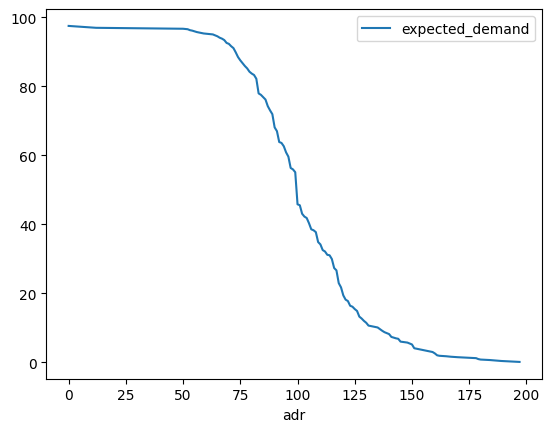

In [33]:
merged_df[(merged_df.dow == 'Friday') & (merged_df.month =='April')].plot(x='adr', y='expected_demand', kind='line')
        


The graphs represent a typical demand curve; demand decreases as price/adr increases. We know that the Expected revenue is a function of both price and demand, so we can explore the expected revenue curve and optimize it by finding the inflection point.


<Axes: xlabel='adr'>

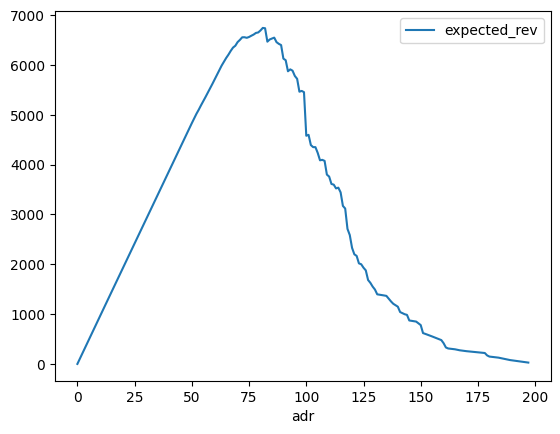

In [34]:
merged_df[(merged_df.dow == 'Friday') & (merged_df.month =='April')].plot(x='adr', y='expected_rev', kind='line')
        

Visually, we can see that the expected revenue is optimized at a price of around 75 to 85. Let’s look at our table to get the exact value.

In [35]:
fri_april = merged_df[(merged_df.dow == 'Friday') & (merged_df.month =='April')].reset_index()

# Gets the max expected rev
fri_april[fri_april.expected_rev == fri_april.expected_rev.max()]

,index,dow,month,adr,rn,rn_sum,rn_mean,rn_median,probability,expected_rns,expected_demand,expected_rev
81,26,Friday,April,81.0,8,713,89.125,97.5,0.01122,1.093969,83.278401,6745.550491


We have manually established that the optimal rate for Fridays in April is 81. At this rate we can expect to sell 83 Rooms.

In [36]:
fri_april[60:89]

,index,dow,month,adr,rn,rn_sum,rn_mean,rn_median,probability,expected_rns,expected_demand,expected_rev
60,47,Friday,April,102.0,6,713,89.125,97.5,0.008415,0.820477,43.075035,4393.653576
61,46,Friday,April,101.0,18,713,89.125,97.5,0.025245,2.461431,45.536466,4599.183029
62,45,Friday,April,100.0,2,713,89.125,97.5,0.002805,0.273492,45.809958,4580.995792
63,44,Friday,April,99.0,68,713,89.125,97.5,0.095372,9.298738,55.108696,5455.760870
64,43,Friday,April,98.0,6,713,89.125,97.5,0.008415,0.820477,55.929173,5481.058906
65,42,Friday,April,97.0,3,713,89.125,97.5,0.004208,0.410238,56.339411,5464.922861
66,41,Friday,April,96.0,24,713,89.125,97.5,0.033661,3.281907,59.621318,5723.646564
67,40,Friday,April,95.0,9,713,89.125,97.5,0.012623,1.230715,60.852034,5780.943198
68,39,Friday,April,94.0,13,713,89.125,97.5,0.018233,1.777700,62.629734,5887.194951
69,38,Friday,April,93.0,7,713,89.125,97.5,0.009818,0.957223,63.586957,5913.586957


We might get more room nights if we decrease the price to 74. However, the increase in room nights is insufficient to compensate for the rate drop.

This brings me back to the experience I described in the initial story. I was suggesting dropping the rates. However, the historical demand showed that while we might have increased the room nights a bit, the drop in rate would have put the hotel below its maximum expected revenue.

So far, we have explored the key concept of revenue optimization through pricing. Still, we have done all the work manually.

The next step is to use the power of statistics and optimization to create a demand curve.

### Price optimization model

Before we build our model, we need to deal with outliers, as those could impact our demand curve calculations.


#### Dealing with Outliers
We will use the z-scores to calculate each data point's distance from the mean and set our threshold at 2. 

We are taking a simplistic approach and removing the outliers as the goal of this notebook is to explain the key concepts of revenue optimization; however, you might have a different approach to dealing with outliers, depending on your objective.


In [37]:
mean = fri_april.adr.mean()
std_dev = fri_april.adr.std()

# Use z-scores
fri_april['z_scores'] = np.abs((fri_april.adr - mean) / std_dev)

In [38]:
fri_april = fri_april[fri_april.z_scores<=2]

#### Fitting a demand curve

In the next step, we will mathematically define the demand curve and fit that function to the actual observed demand we have calculated before. To do so, we are using scipy module.

This step will require experimentation with different demand curve functions and initial parameters. After much experimentation, I choose the demand curve I will show below. However, this is not the only possible demand curve definition. Moreover, while I am using Scipy to fit the demand curve, you could use different machine learning models. Depending on the model you choose, the below steps will be different.

For my demand curve, I used an exponential demand function, often used in economics and business, to model how the quantity demanded of a product or service changes with price.


In [40]:
from scipy.optimize import curve_fit

# Define the demand curve function
def demand_curve(x, a, b, c, d, max_demand):
    demand = a * np.exp(-b * x) + c
    demand = np.where(x <= max_demand, np.minimum(demand, max_demand), demand)
    return demand + d

# Convert dataframe columns to numpy arrays
x_data = fri_april['adr'].values
y_data = fri_april['expected_demand'].values


initial_guess = [1, 0.01, 1, 1, 100]
bounds = ([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])

# Fit the demand curve to the data
params, _ = curve_fit(demand_curve, x_data, y_data, bounds=bounds, p0=initial_guess)

# Extract the fitted parameters
a_fit, b_fit, c_fit ,d_fit,max_demand= params




The `demand_curve` function represents a demand curve, incorporating additional parameters and constraints. Here's an explanation of the components of this function:


- **x:** Price

- **a, b, c, d:** These are parameters that control the shape and behavior of the demand curve.
  - 'a' affects the amplitude or scale of the demand curve.
  - 'b' determines the rate of decrease in demand as 'x' increases.
  - 'c' represents factors other than 'x' (price) that can affect demand.
  - 'd' represents an additional constant that can shift the entire demand curve up or down.

- **max_demand:** It defines a maximum demand level, and the demand curve is constrained not to exceed this value. This is a manual addition to avoid having unrealistically high values at very low prices - this is a business constraint, as the hotel would not sell at low rates, such as 10 or 5, even if the demand was extremely high. This step is not necessary, and I could have used another demand function instead. However, in the interest of time, I added this constraint.

- **demand = a * np.exp(-b * x) + c:** This is the core of the demand curve equation, representing the basic demand behavior. 

- **np.where(x <= max_demand, np.minimum(demand, max_demand), demand):** This part of the code is applying a constraint to the demand curve. It checks if 'x' (price) is less than or equal to 'max_demand' and, if so, replaces the demand with the minimum value between the calculated demand and 'max_demand.' This ensures that the demand doesn't exceed 'max_demand' when 'x' is within that range.



In [41]:
predicted_demand = demand_curve(x_data, a_fit, b_fit,c_fit,d_fit,max_demand)

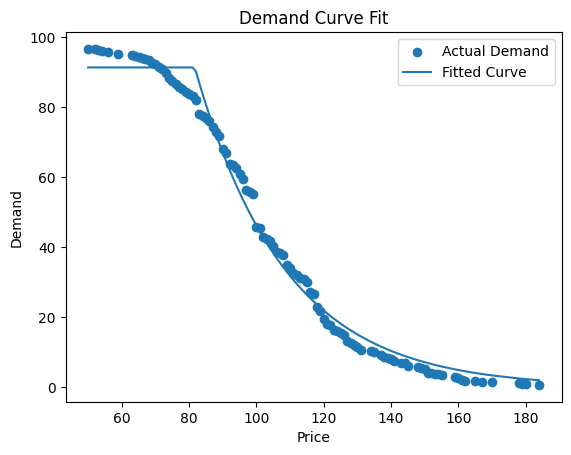

In [42]:
plt.scatter(x_data, y_data, label='Actual Demand')
plt.plot(x_data, predicted_demand, label='Fitted Curve')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.legend()
plt.title('Demand Curve Fit')
plt.show()

As we can see, our demand curve fits pretty closely with the demand data. The fit is not perfect, and with more experimentation, we could have achieved a better result; however, the results will help us explain the remaining steps in our pricing optimization model.

The next step is to use this defined demand curve to calculate the revenue for each price point to optimize the Revenue function, similar to what we did manually in the steps above.


####  The Revenue function 

In [43]:
def revenue(price):
    return price * demand_curve(price, a_fit, b_fit,c_fit,d_fit,max_demand)



The Revenue is simply defined as the Price * Demand.

Now, we can turn our pricing model into a when you have a one-dimensional optimization problem. We want the price that maximizes the revenue function.

To achieve this, we will use the function `minimize_scalar ` from scipy. As the name implies, this function is used to minimize the function, so to maximize the Revenue function using `minimize_scalar`, we can minimize the negative of the revenue function.

This is a necessary workaround because scipy does not have a maximum scalar function.


In [44]:
#Define the objective function to maximize (negative revenue to convert maximization to minimization problem)
objective = lambda price: -revenue(price)

In [45]:
from scipy.optimize import minimize_scalar

result = minimize_scalar(objective, bounds=(60, 180), method='bounded')
optimal_price = result.x
max_revenue = -result.fun
room_sold = demand_curve(optimal_price, a_fit, b_fit,c_fit,d_fit,max_demand)

In [46]:
print(f"The optimal price to maximize revenue: ${optimal_price}")
print(f"The maximum revenue achievable: ${max_revenue}")
print(f"The expected number of rooms to sell: {room_sold}")

The optimal price to maximize revenue: $81.67373212822696
The maximum revenue achievable: $7463.729902999212
The expected number of rooms to sell: 91.38470483118402


As we can see, our optimal price that maximizes revenue is 82, which is very similar to the optimal price we established manually. At this price, we can expect to sell 91 rooms.

One natural question you could ask is: What if I don't have 91 rooms left to sell? What if I only have 50 rooms to sell?
Typically, the fewer available rooms for sale, the higher the rate you can command. So, while the price of 81 can be optimal, we could increase the price to account for our limited inventory.

We know the expected demand for each price point, so if we only have 50 rooms to sell, we can find the price point that will yield 50 rooms of demand.

We need to create a formula to turn demand into price to find this.


In [47]:
from scipy.optimize import brentq

def demand_to_price(num_rooms, a, b, c, d, max_demand):
   
    def root_func(x):
        return num_rooms - (a * np.exp(-b * x) + c)
    
    # Find the price using numerical root finding
    price = brentq(root_func, 0, 200)  # Adjust the interval bounds as needed
    
    return price

In [48]:
demand_to_price(50,a_fit,b_fit,c_fit,d_fit,max_demand)

97.86747524192853

So, for example, in our case, if we only have 50 rooms left to sell, we could increase the price to 98.


#### Model limitations and simplifications

In this example, we have simplified the problem by not accounting for lead times and booking windows, as the objective is to explain how pricing models in the hotel industry work.

Lead time is an essential factor to consider if you are going to deploy your pricing model, as your pricing would be very different if you had 50 rooms left to sell 90 days before arrival or if you had 50 rooms left to sell on the arrival day.



# Pricing Model

So far, we have created a model for Fridays in April only.

Let's create a dataframe with the optimal rate for all Months and DOW.

In the dataframe, we will include:
- month
- dow
- optimal rate
- number of rooms expected to sell
- optimal revenue
- optimal rate with limited inventory


In [49]:
results = pd.DataFrame(columns=['month', 'dow', 'optimal_rate', 'expected_rn','expected_rev','optimal_rate_lim_inv'])

In [50]:
months = merged_df.month.unique()
dow = merged_df.dow.unique()

April Friday


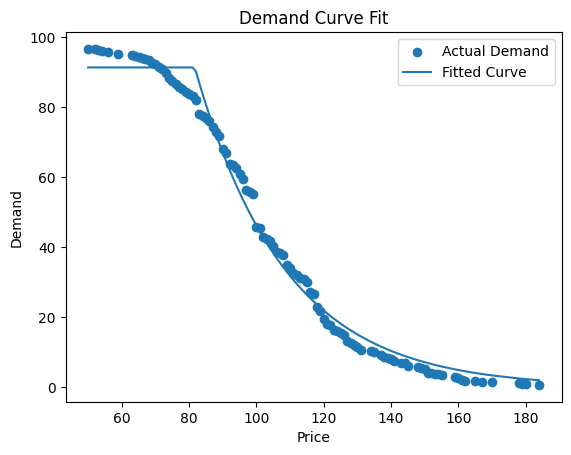

April Monday


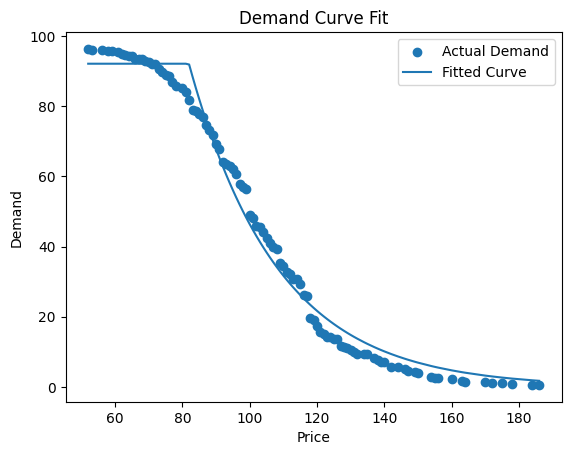

April Saturday


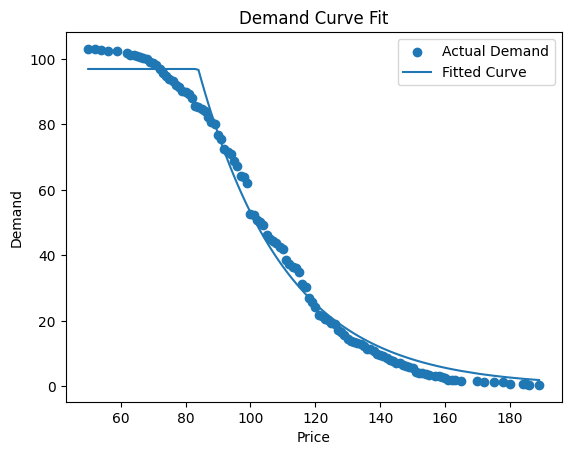

April Sunday


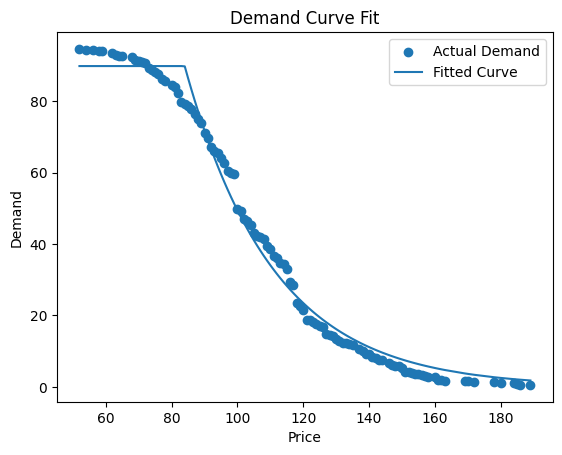

April Thursday


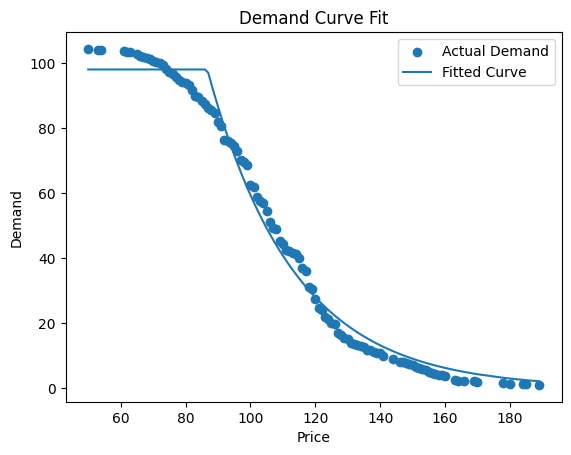

April Tuesday


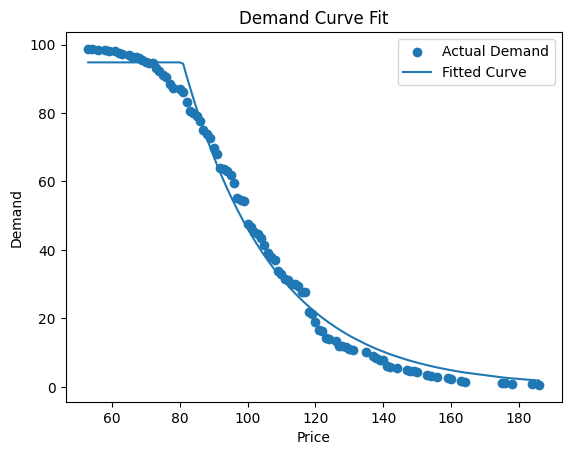

April Wednesday


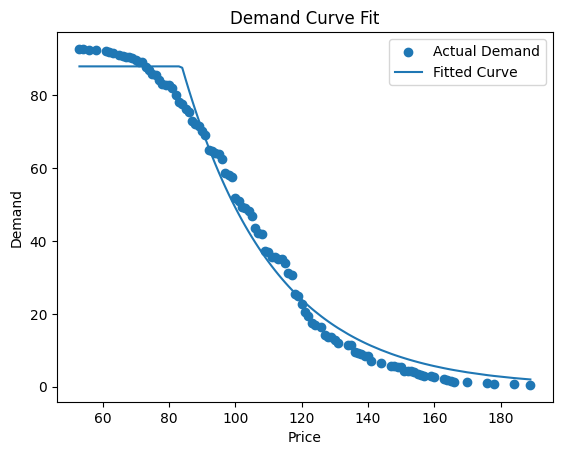

August Friday


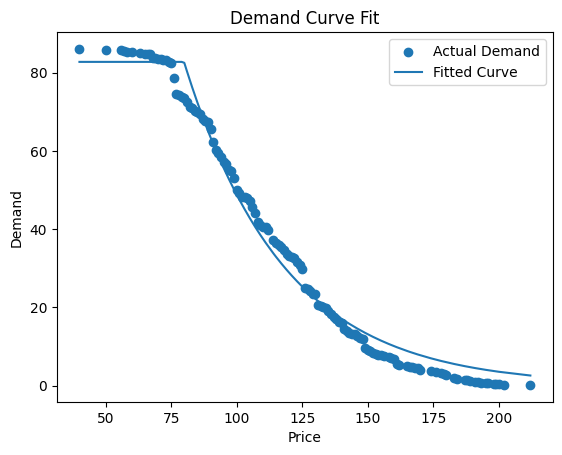

August Monday


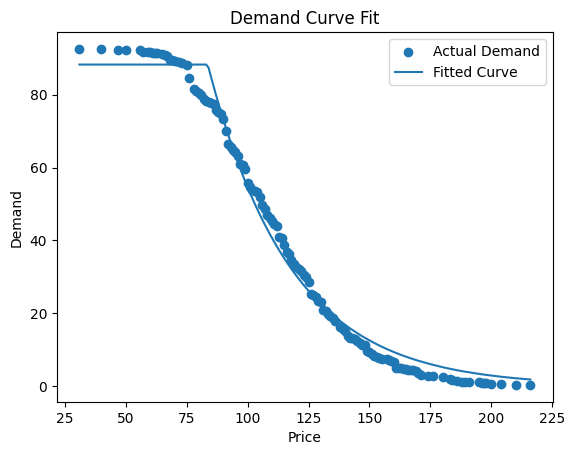

August Saturday


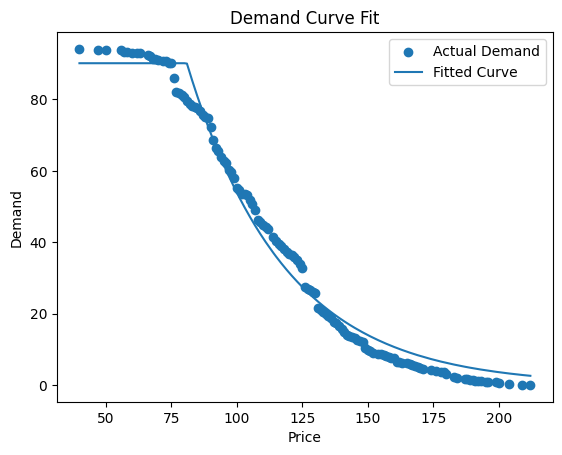

August Sunday


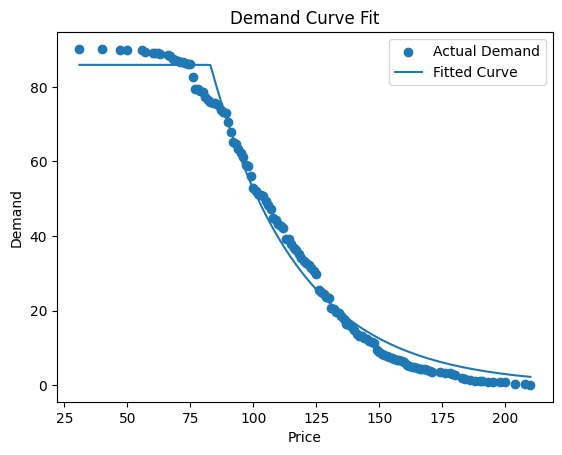

August Thursday


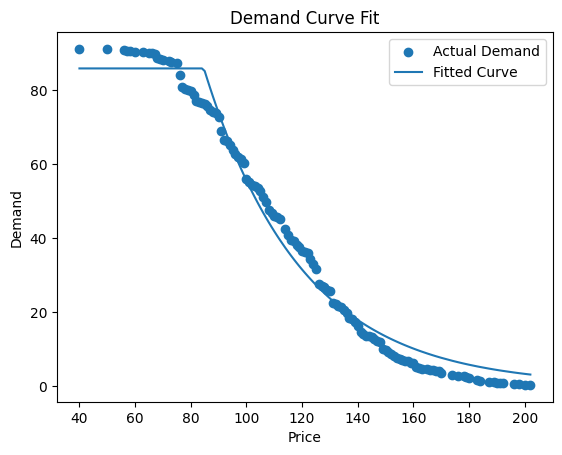

August Tuesday


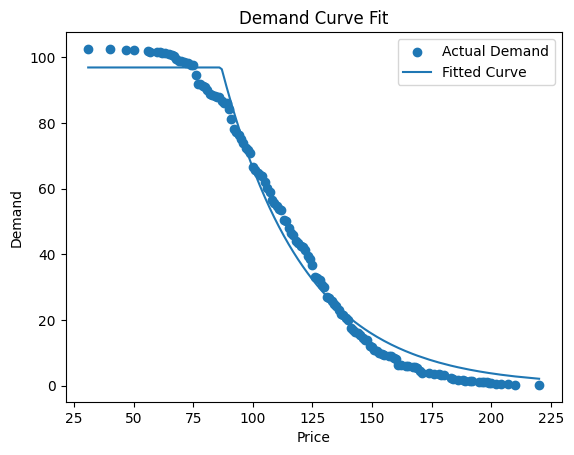

August Wednesday


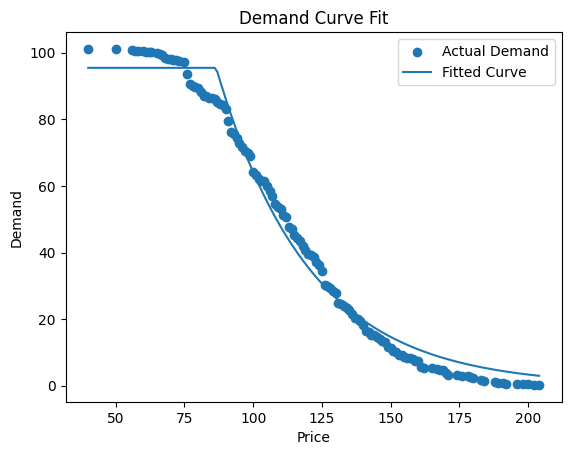

December Friday


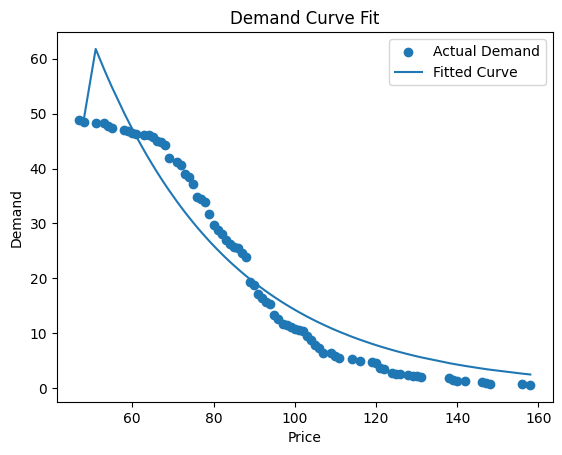

December Monday


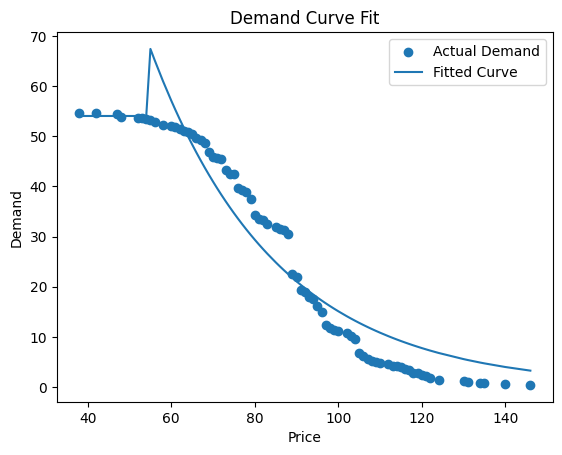

December Saturday


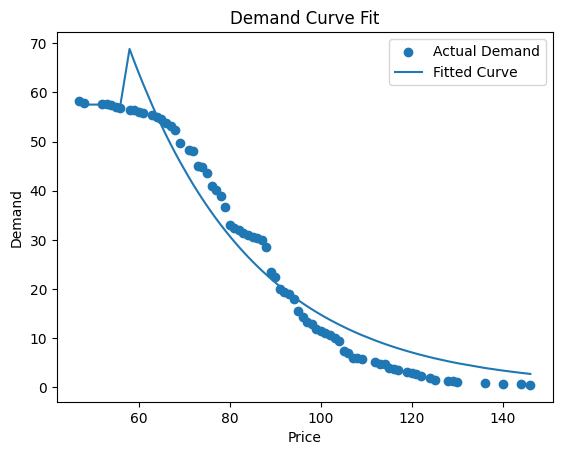

December Sunday


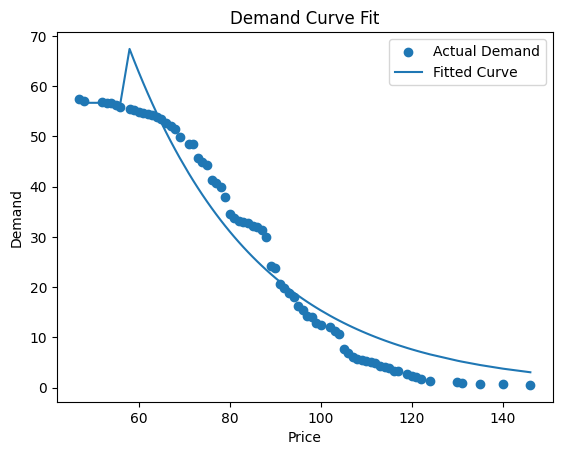

December Thursday


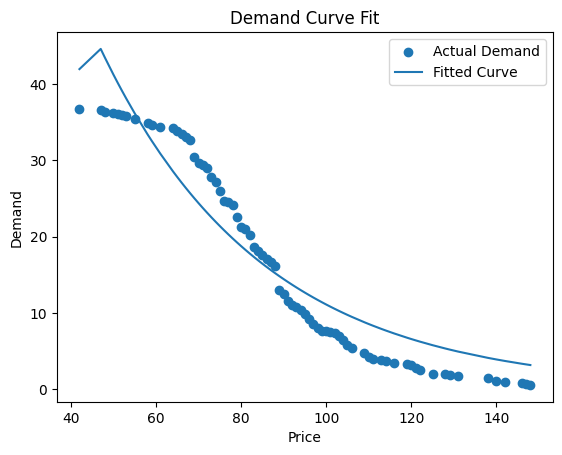

December Tuesday


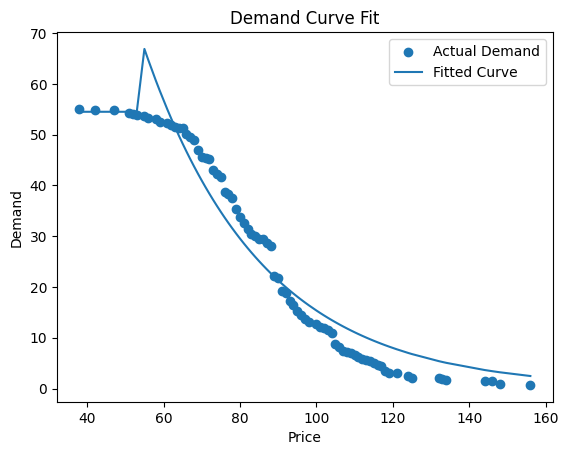

December Wednesday


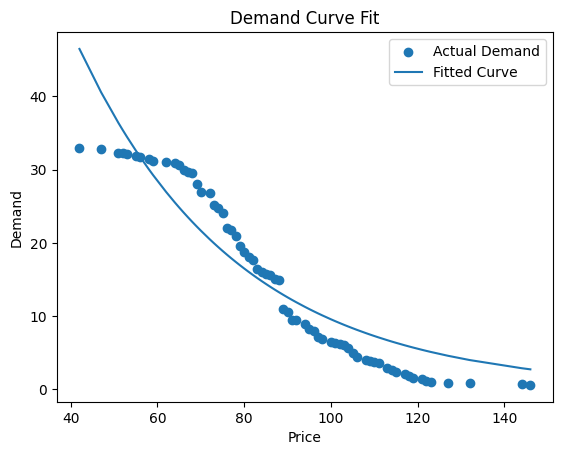

February Friday


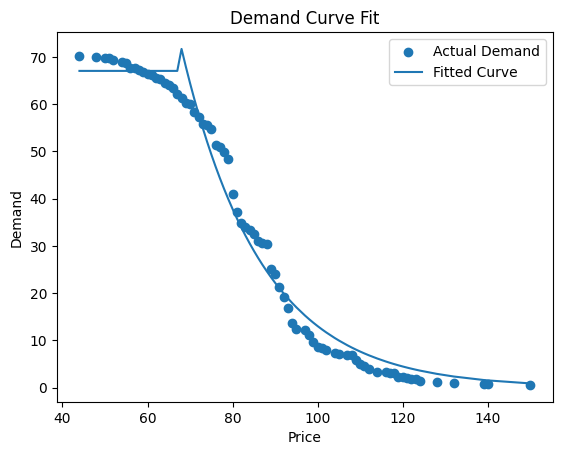

February Monday


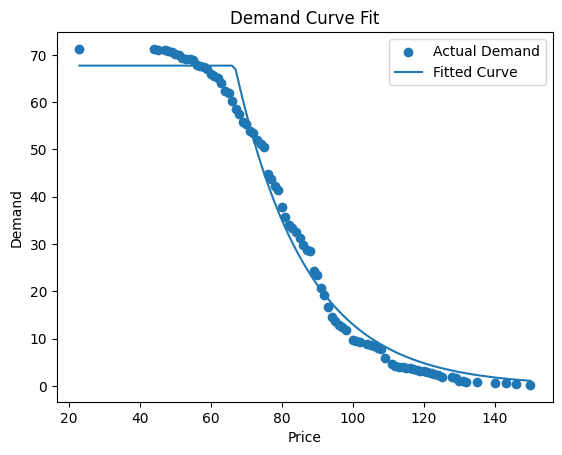

February Saturday


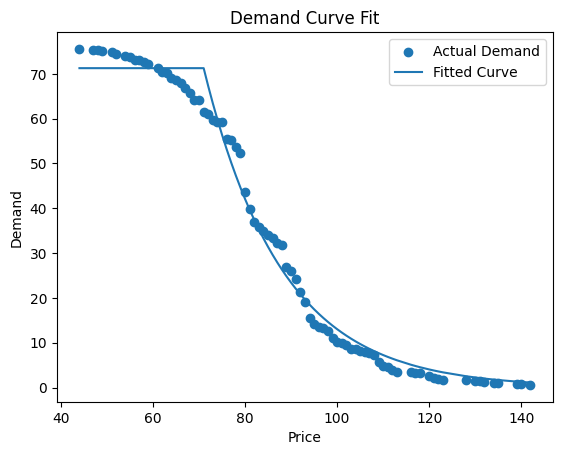

February Sunday


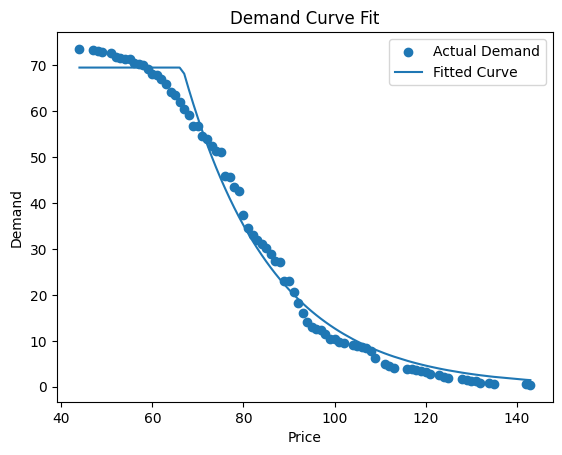

February Thursday


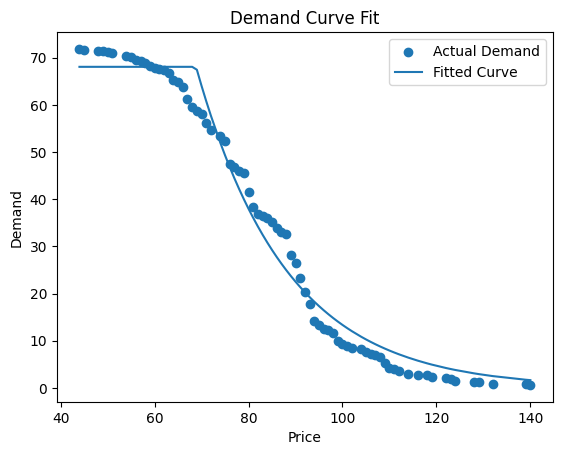

February Tuesday


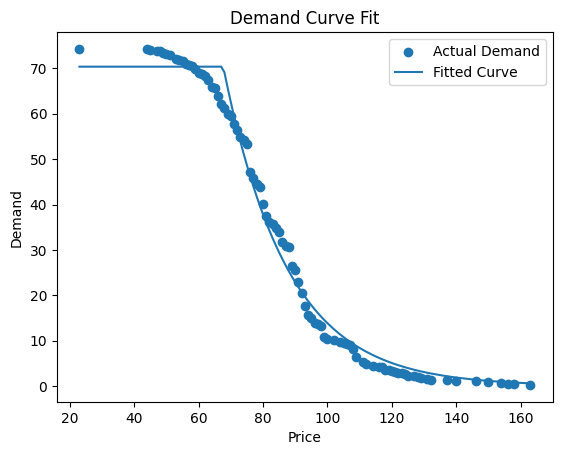

February Wednesday


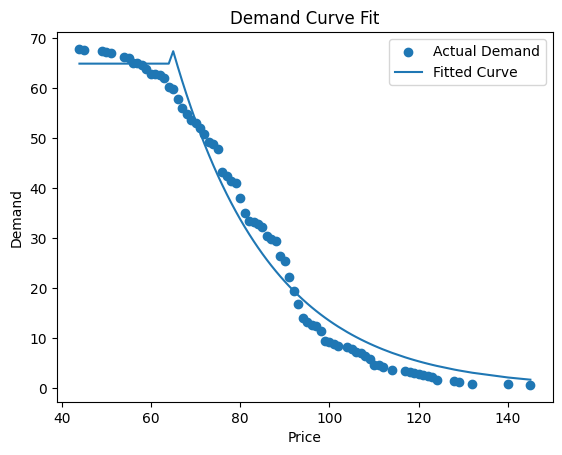

January Friday


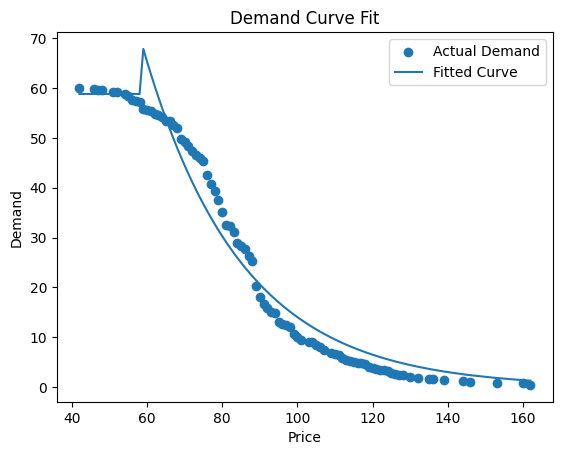

January Monday


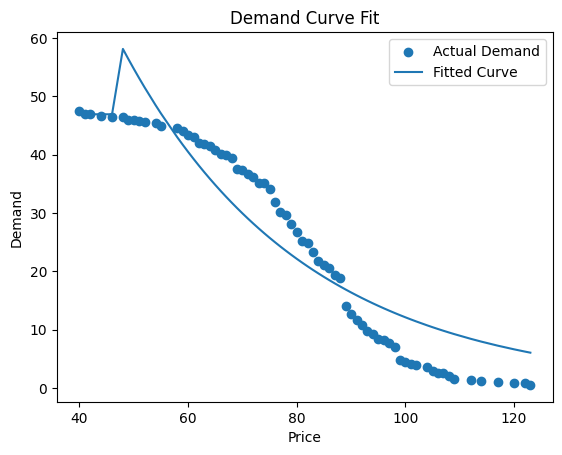

January Saturday


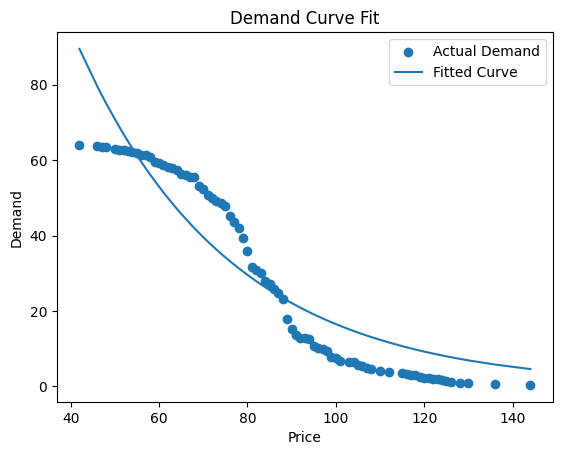

January Sunday


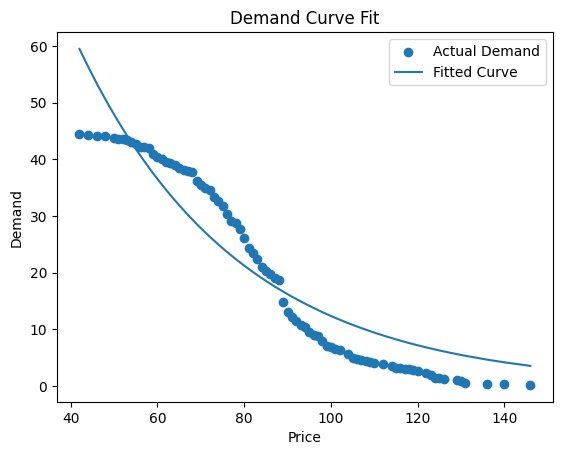

January Thursday


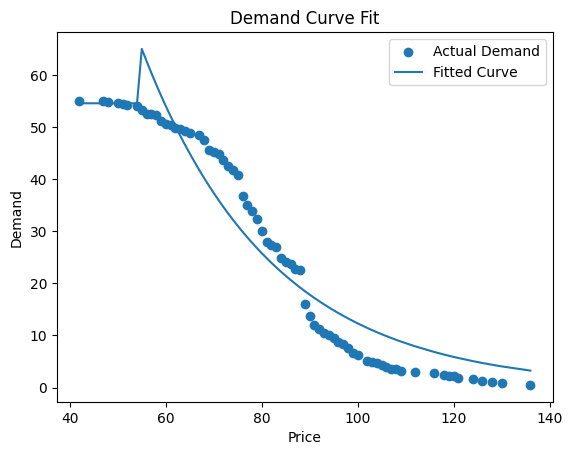

January Tuesday


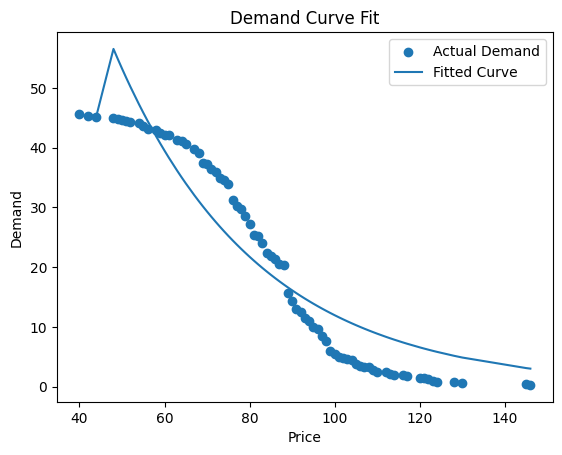

January Wednesday


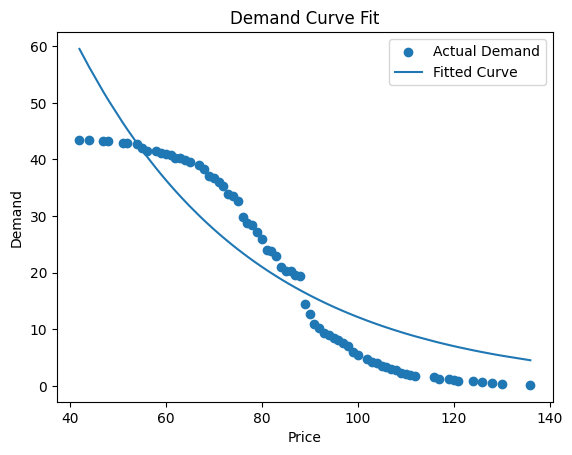

July Friday


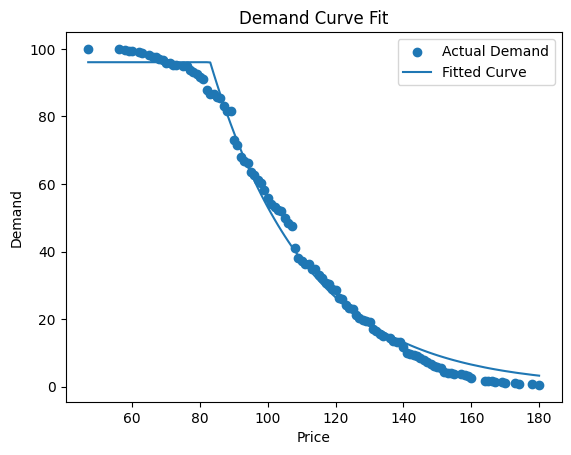

July Monday


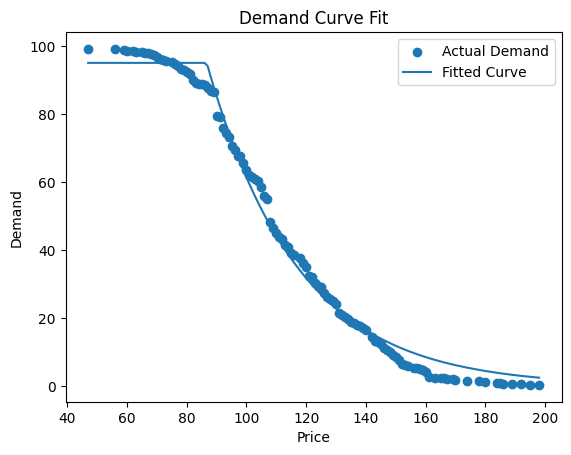

July Saturday


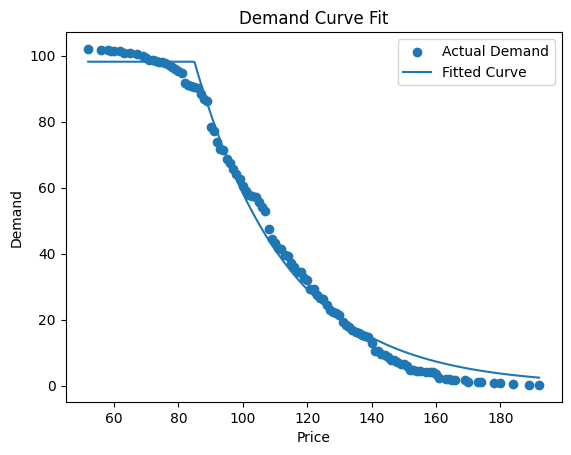

July Sunday


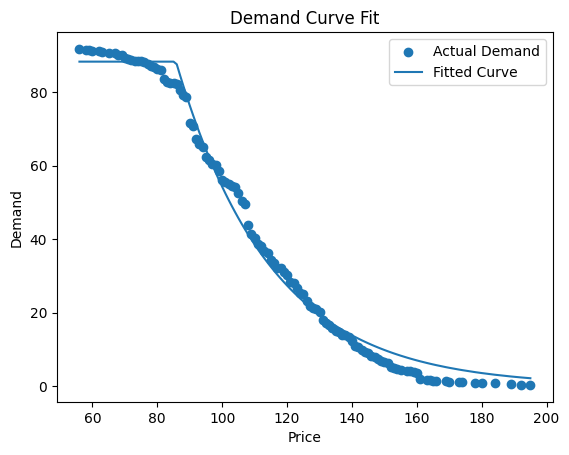

July Thursday


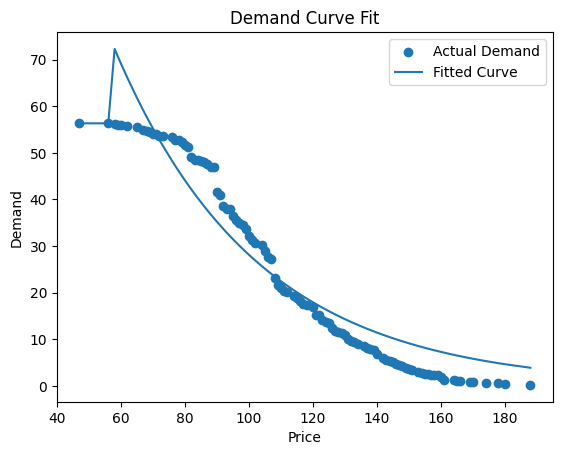

July Tuesday


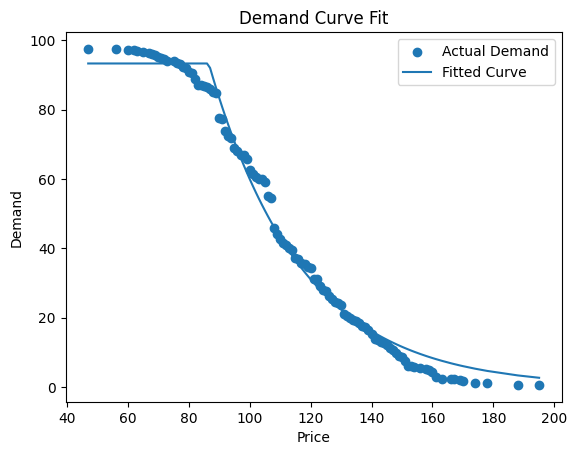

July Wednesday


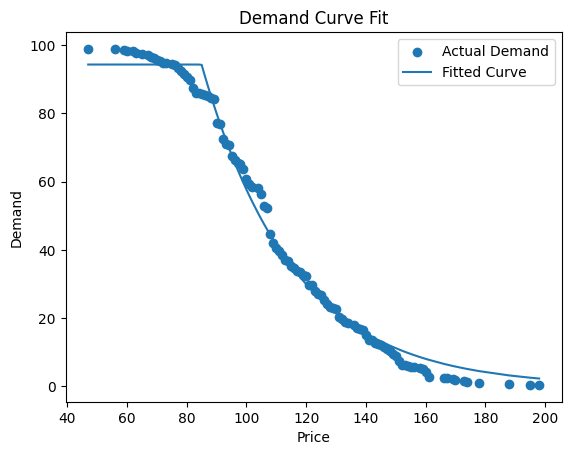

June Friday


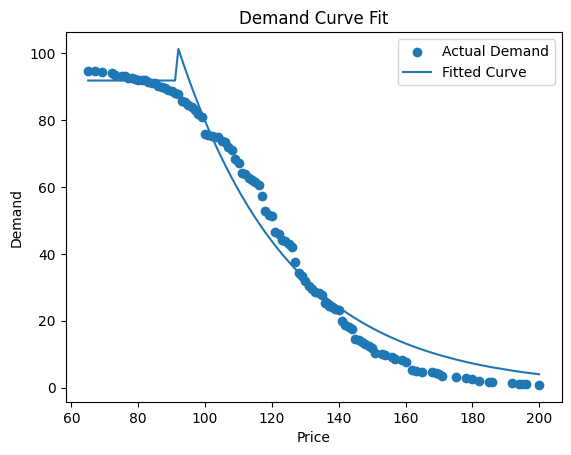

June Monday


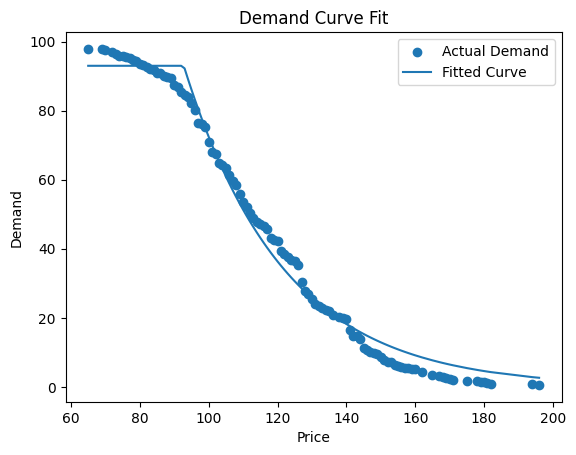

June Saturday


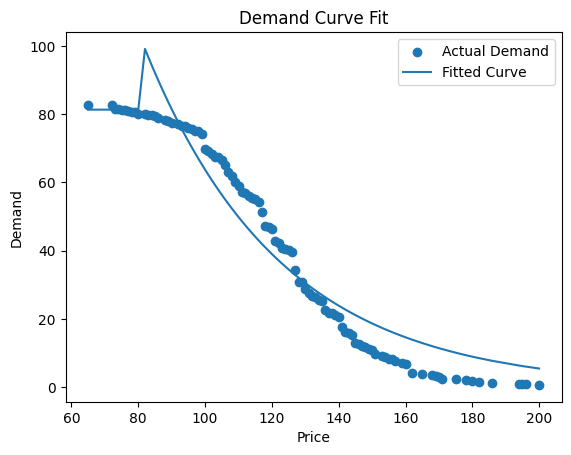

June Sunday


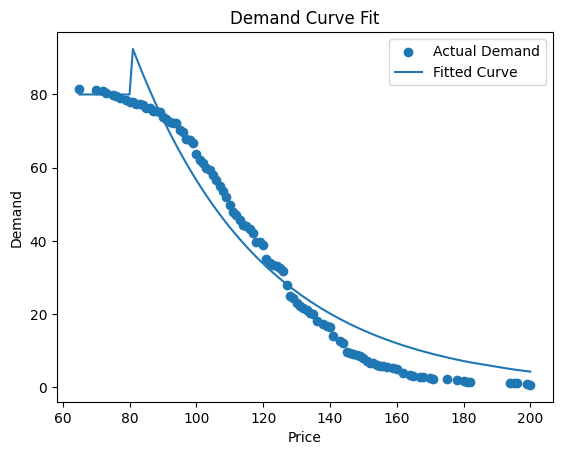

June Thursday


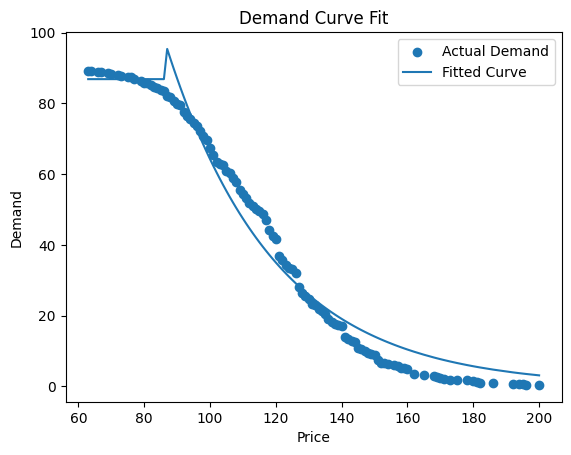

June Tuesday


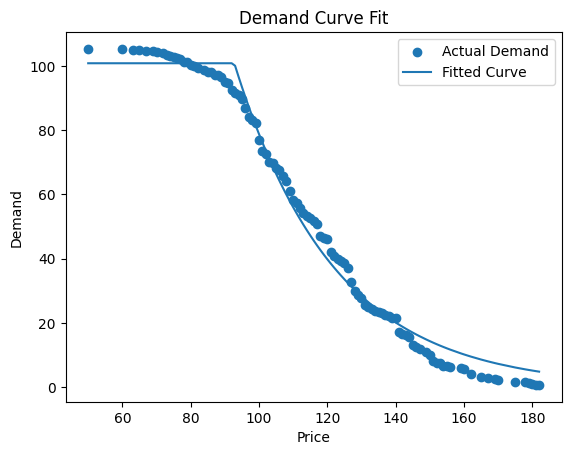

June Wednesday


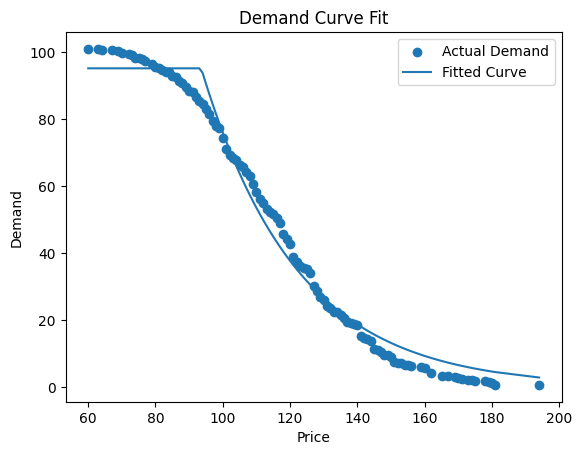

March Friday


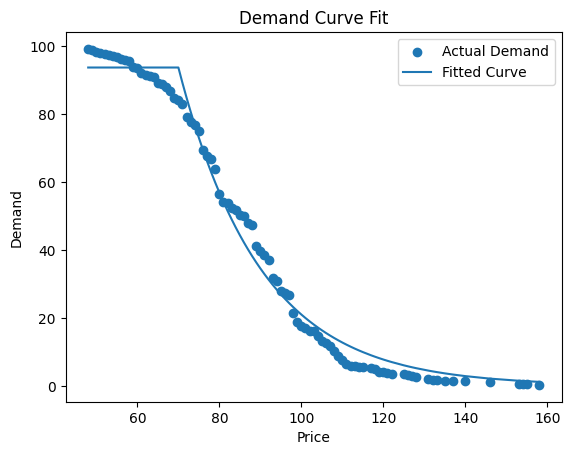

March Monday


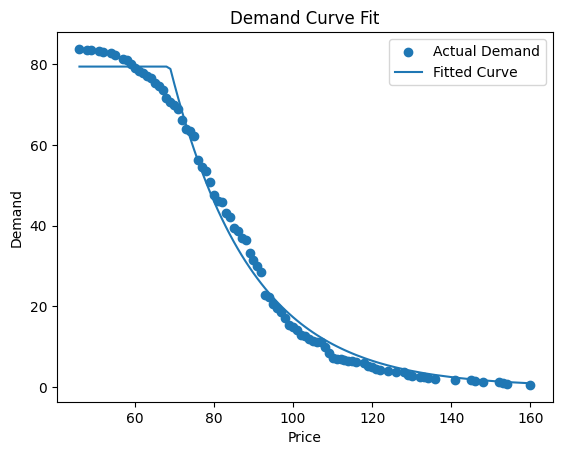

March Saturday


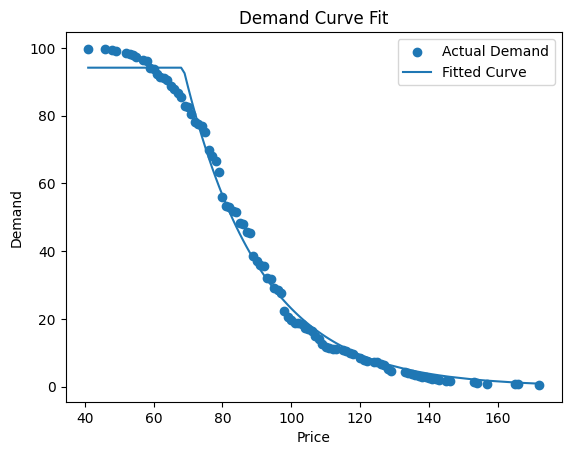

March Sunday


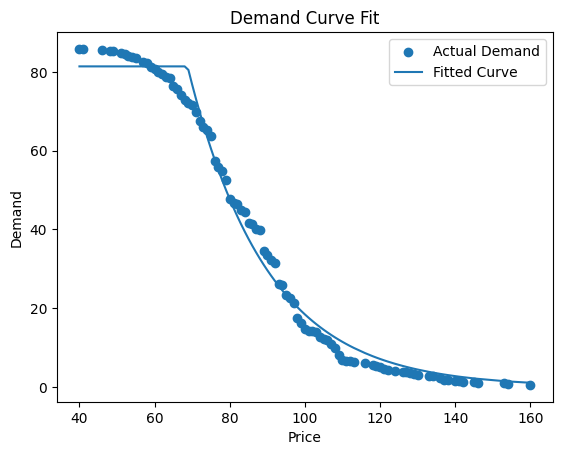

March Thursday


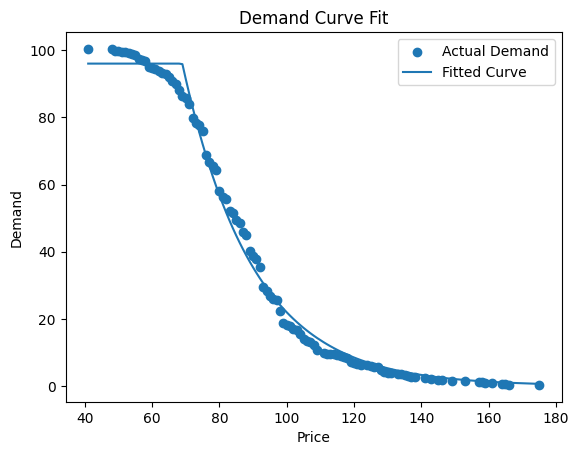

March Tuesday


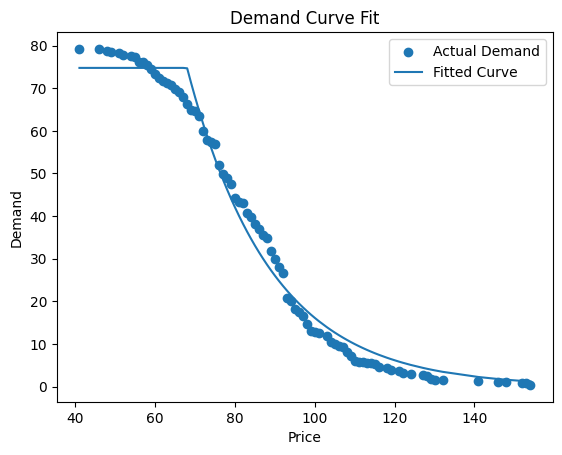

March Wednesday


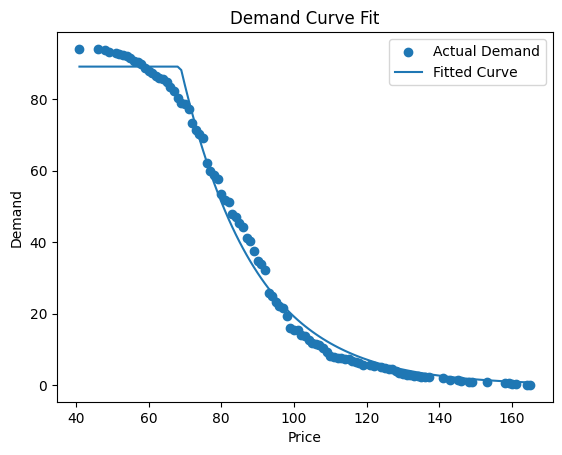

May Friday


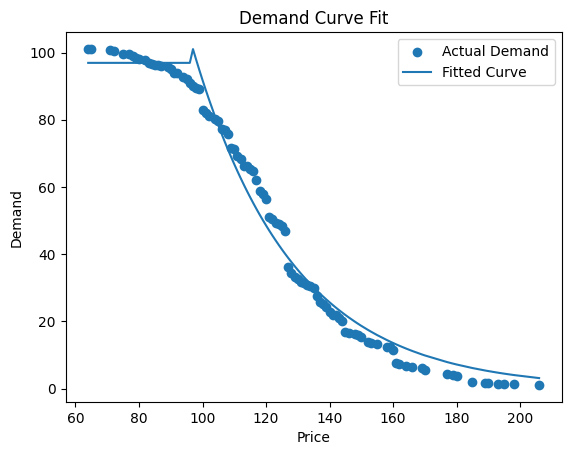

May Monday


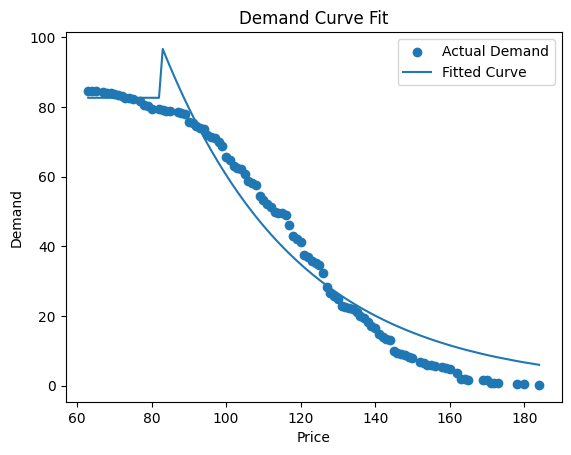

May Saturday


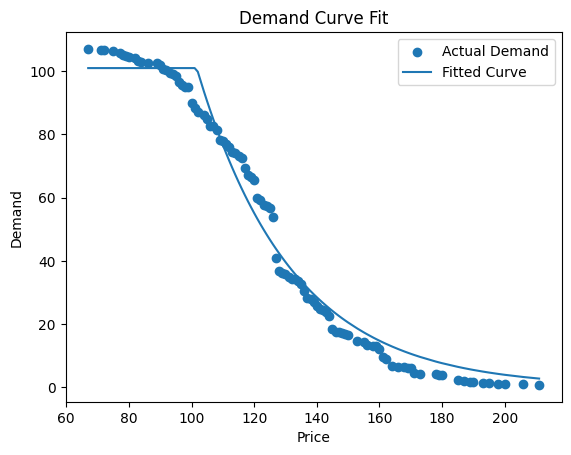

May Sunday


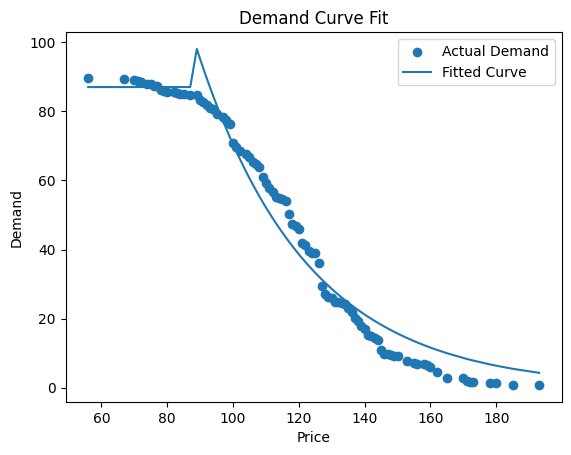

May Thursday


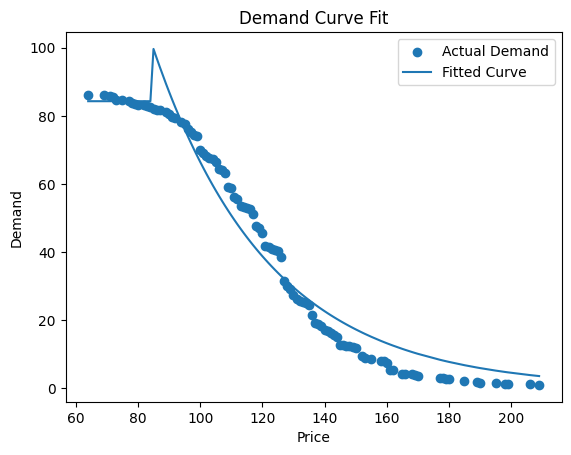

May Tuesday


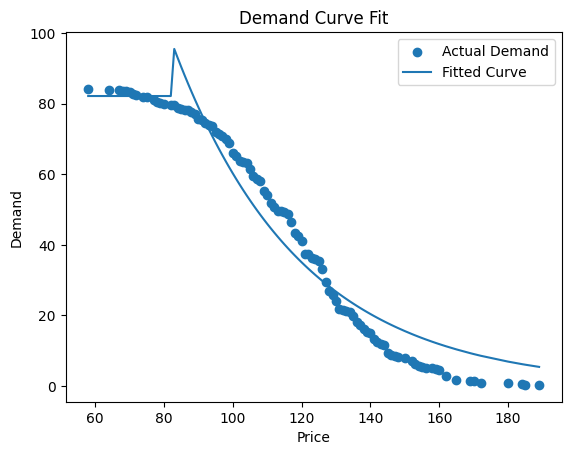

May Wednesday


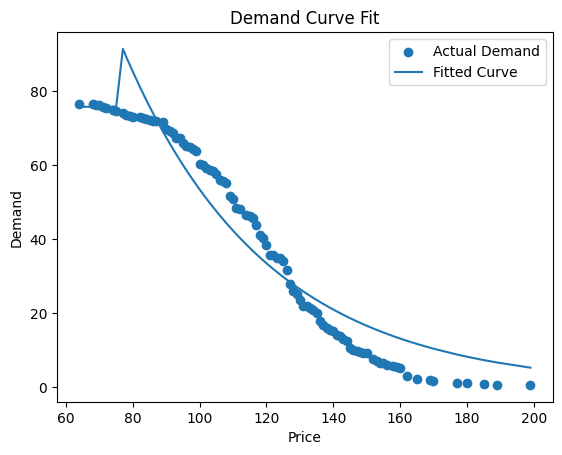

November Friday


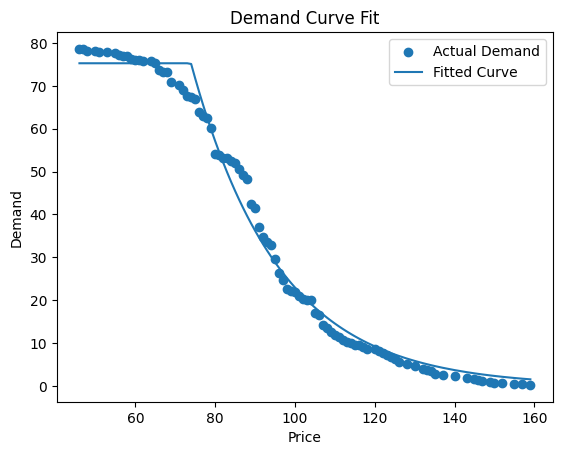

November Monday


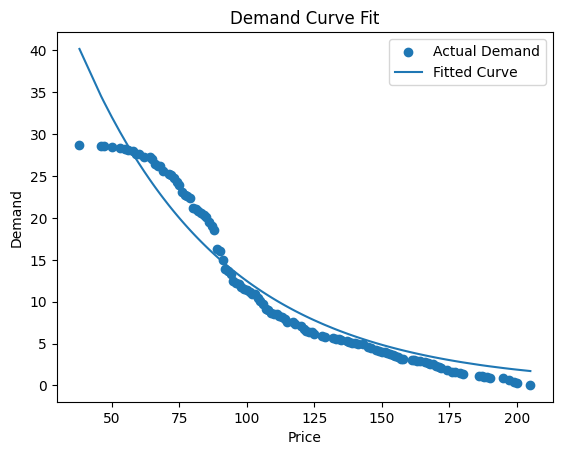

November Saturday


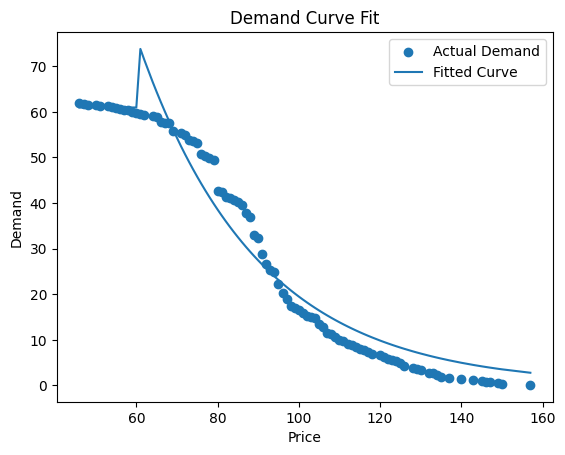

November Sunday


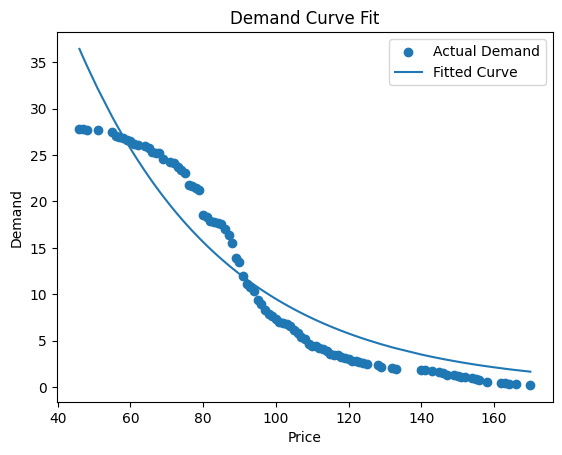

November Thursday


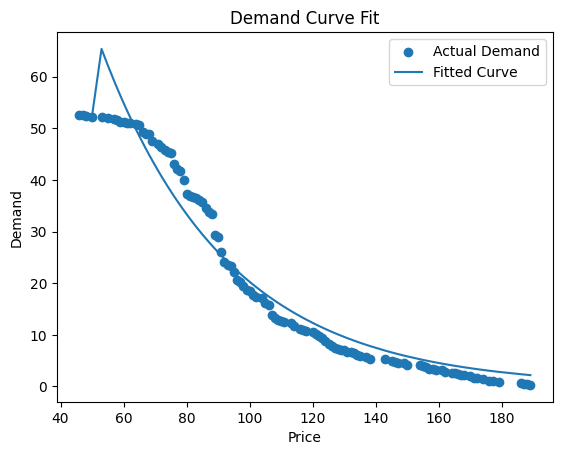

November Tuesday


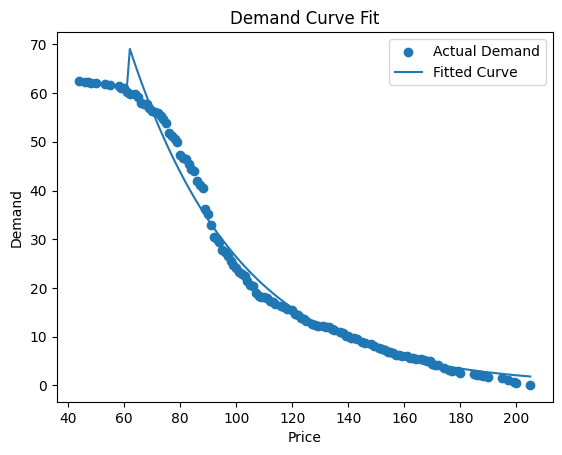

November Wednesday


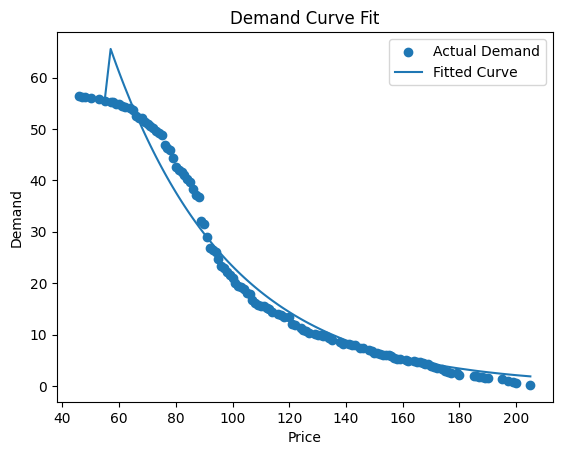

October Friday


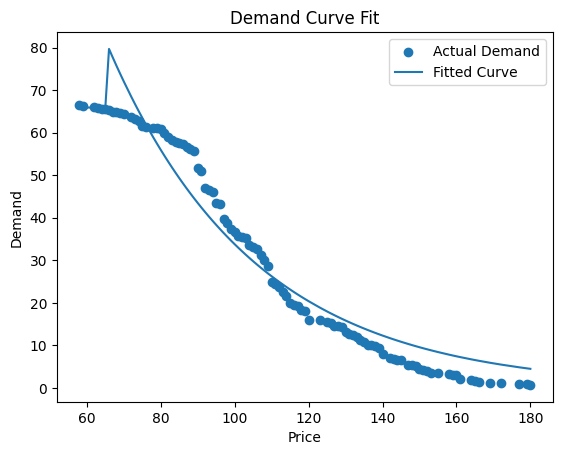

October Monday


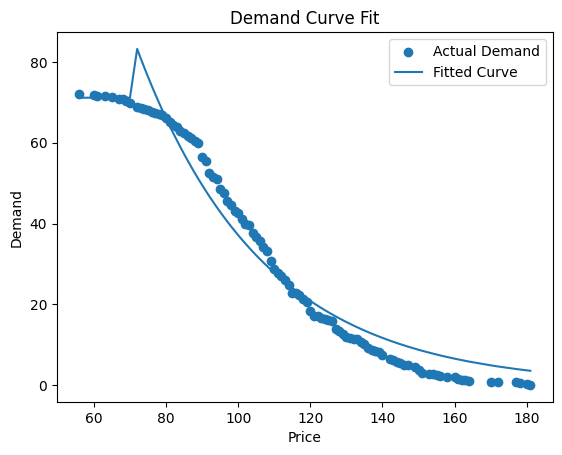

October Saturday


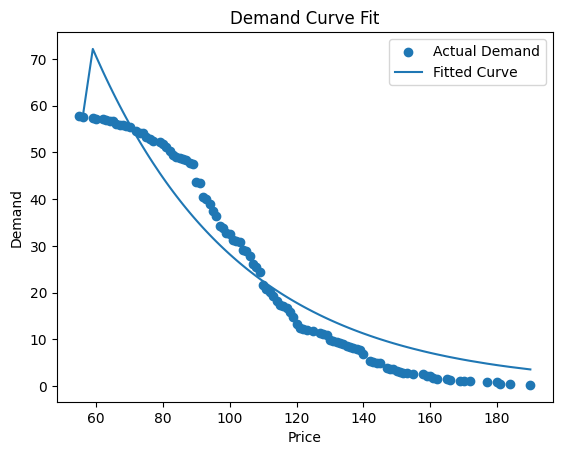

October Sunday


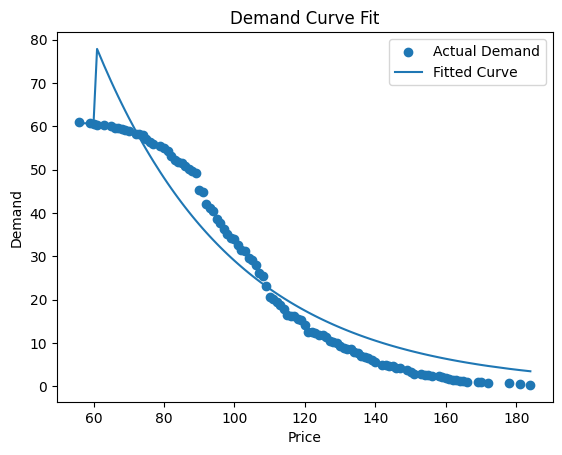

October Thursday


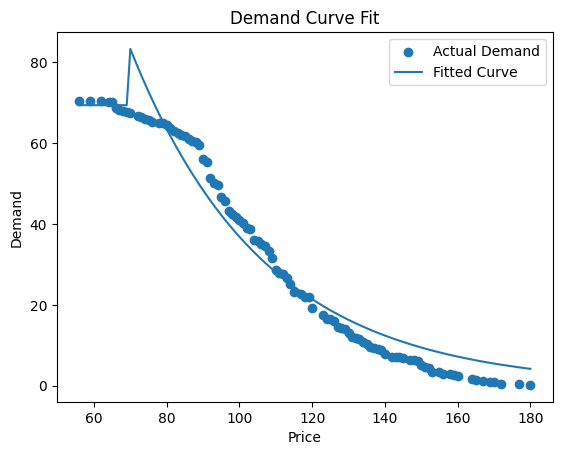

October Tuesday


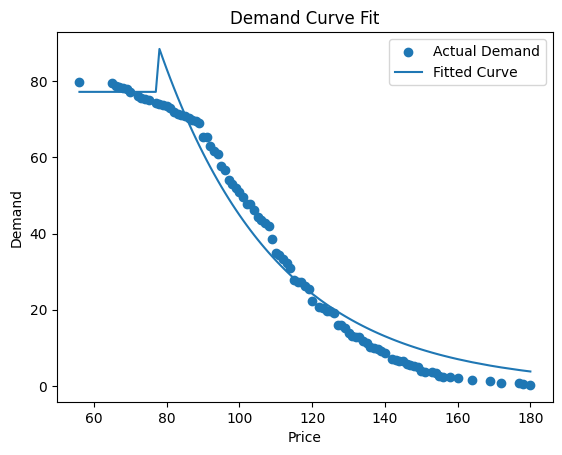

October Wednesday


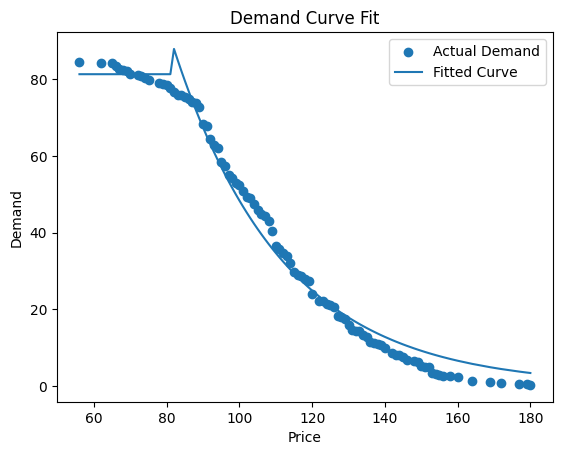

September Friday


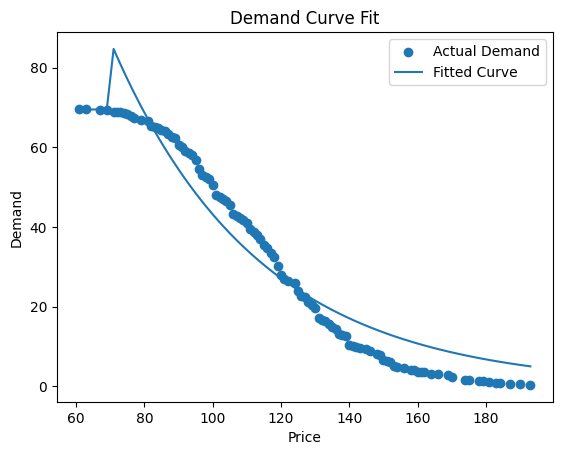

September Monday


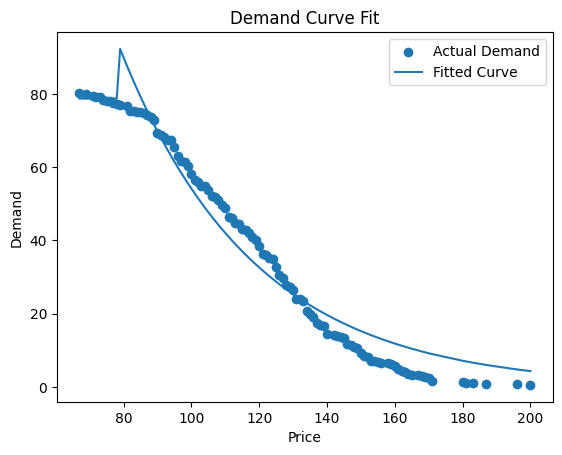

September Saturday


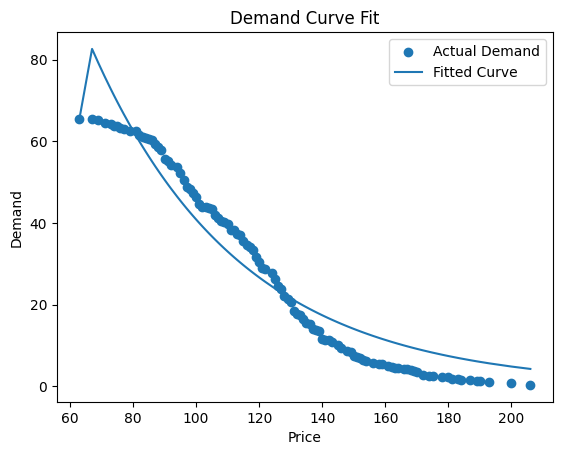

September Sunday


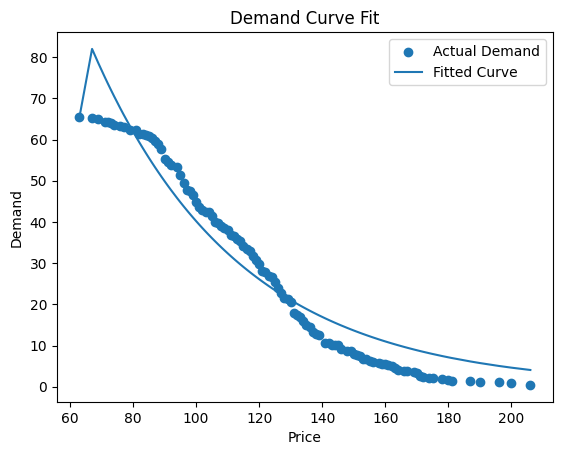

September Thursday


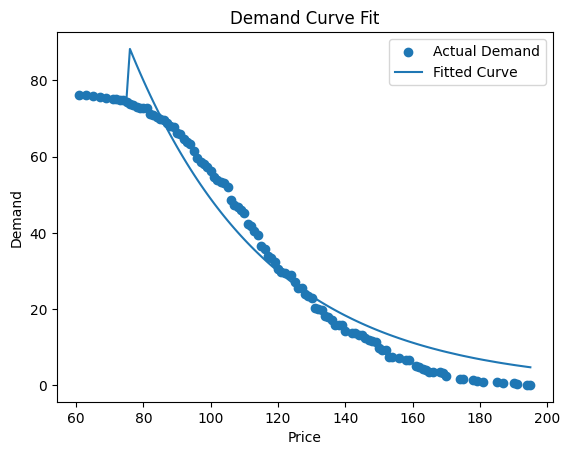

September Tuesday


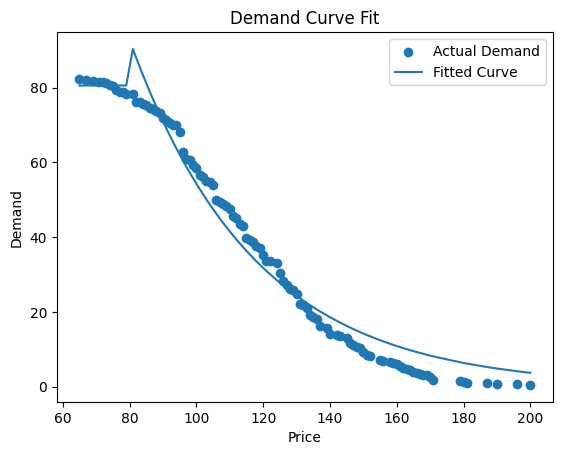

September Wednesday


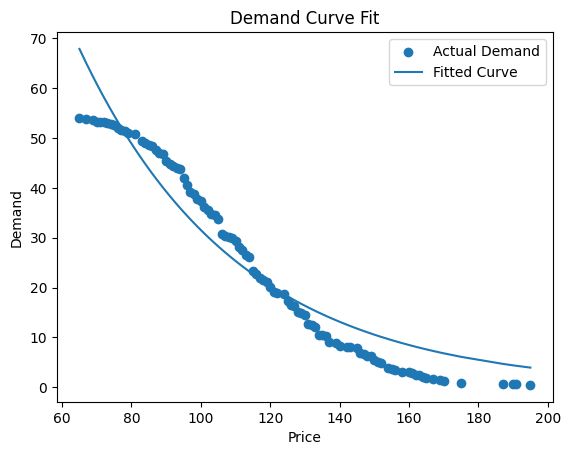

In [51]:
#Create a loop to observe if our demand curve fits properly to each demand month and dow


for month in months:
    for day in dow:
        
        print(month,day)
        #get data
        data = merged_df[(merged_df.dow == day) & (merged_df.month ==month)].reset_index()
        
        #remove outlier
        mean = data.adr.mean()
        std_dev = data.adr.std()
       

        # calculate z-scores
        data['z_scores'] = np.abs((data.adr - mean) / std_dev)
        
        #filter out outliers
        data = data[data.z_scores <=2]
        
        ## Fit Demand curve
        x_data = data['adr'].values
        y_data = data['expected_demand'].values
        
        # Try except expression to ensure we get no errors when fitting the demand curve due to our initial guess
        try:
            initial_guess = [1, 0.01, 1, 1,data['rn_median'].values[0] ]
            bounds = ([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])

        # Fit the demand curve to the data
            params, _ = curve_fit(demand_curve, x_data, y_data, bounds=bounds, p0=initial_guess)
        except:
            if month =='January':
                
                initial_guess = [1, 0.01, 1, 1,40 ]
            else:
                initial_guess = [1, 0.01, 1, 1,50 ]
            bounds = ([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])

        # Fit the demand curve to the data
            params, _ = curve_fit(demand_curve, x_data, y_data, bounds=bounds, p0=initial_guess)
        
        # Extract the fitted parameters
        a_fit, b_fit, c_fit ,d_fit,max_demand= params
        
        #visually explore if the demand curve fits the data
        predicted_demand = demand_curve(x_data, a_fit, b_fit,c_fit,d_fit,max_demand)
        
        plt.scatter(x_data, y_data, label='Actual Demand')
        plt.plot(x_data, predicted_demand, label='Fitted Curve')
        plt.xlabel('Price')
        plt.ylabel('Demand')
        plt.legend()
        plt.title('Demand Curve Fit')
        plt.show()

### Key note

While the demand curve does not fit the actual data in some cases, it does a good enough job in most cases. 

As the objective of the workbook is to review concepts and implement a simple Pricing Model, we will continue. 

However, before implementing it in a real scenario, I would want to dig deeper into those cases where the demand curve function does not fit the actualized demand.


In [52]:
for month in months:
    for day in dow:
        
      
        #get data
        data = merged_df[(merged_df.dow == day) & (merged_df.month ==month)].reset_index()
        
        #remove outlier
        mean = data.adr.mean()
        std_dev = data.adr.std()
       

        # calculate z-scores
        data['z_scores'] = np.abs((data.adr - mean) / std_dev)
        
        #filter out outliers
        data = data[data.z_scores <=2]
        
        ## Fit Demand curve
        x_data = data['adr'].values
        y_data = data['expected_demand'].values
        
        # Try except expression to ensure we get no errors when fitting the demand curve due to our initial guess
        try:
            initial_guess = [1, 0.01, 1, 1,data['rn_median'].values[0] ]
            bounds = ([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])

        # Fit the demand curve to the data
            params, _ = curve_fit(demand_curve, x_data, y_data, bounds=bounds, p0=initial_guess)
        except:
            if month =='January':
                
                initial_guess = [1, 0.01, 1, 1,40 ]
            else:
                initial_guess = [1, 0.01, 1, 1,50 ]
            bounds = ([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])

        # Fit the demand curve to the data
            params, _ = curve_fit(demand_curve, x_data, y_data, bounds=bounds, p0=initial_guess)
        
        # Extract the fitted parameters
        a_fit, b_fit, c_fit ,d_fit,max_demand= params
        
        #optimze revenue
        objective = lambda price: -revenue(price)
        
        

        optimize = minimize_scalar(objective, bounds=(45, 200), method='bounded')
        optimal_price = optimize.x
        max_revenue = -optimize.fun
        
        expected_rns = demand_curve(optimal_price,a_fit, b_fit, c_fit ,d_fit,max_demand)
        
        optimal_rate_lim_inv = demand_to_price(50,a_fit,b_fit,c_fit,d_fit,max_demand)
        
        new_row = pd.DataFrame({'month':month,
                        'dow':day,
                       'optimal_rate': optimal_price,
                       'expected_rev':max_revenue,
                       'expected_rn':expected_rns,
                       'optimal_rate_lim_inv':optimal_rate_lim_inv},index=[0])
        results = pd.concat([results, new_row], ignore_index=True)
        
        
       

C:\Users\AthPat\AppData\Local\Temp\ipykernel_8160\244751000.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


C:\Users\AthPat\AppData\Local\Temp\ipykernel_8160\973623735.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = results.groupby(['month', 'dow'])['optimal_rate'].mean().unstack()


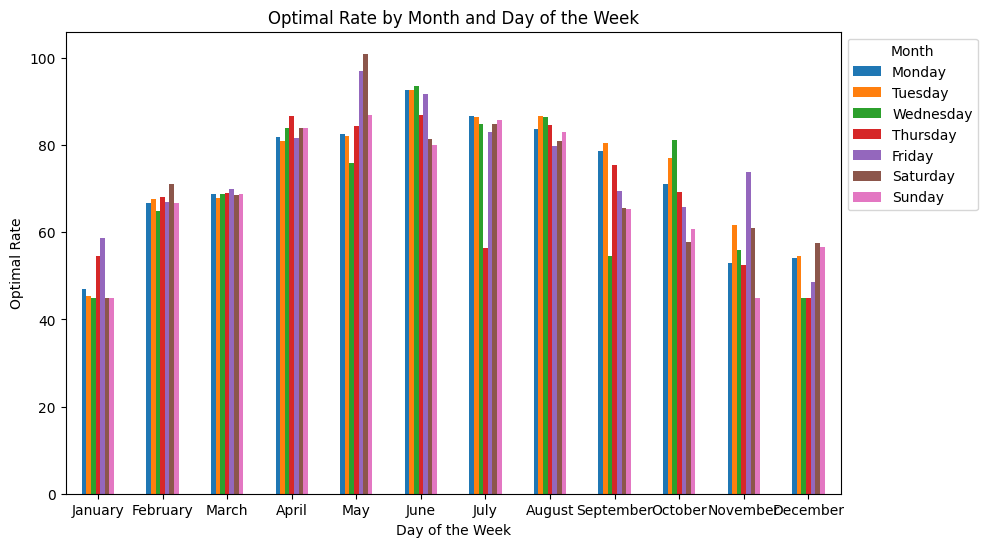

In [53]:
# visualize the results

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the dataframe by the custom order
results['month'] = pd.Categorical(results['month'], categories=month_order, ordered=True)
results['dow'] = pd.Categorical(results['dow'], categories=dow_order, ordered=True)
results = results.sort_values(['month', 'dow'])

grouped = results.groupby(['month', 'dow'])['optimal_rate'].mean().unstack()

# Create the graph
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(ax=ax, kind='bar')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Optimal Rate')
ax.set_title('Optimal Rate by Month and Day of the Week')

# Customize the appearance (optional)
plt.legend(title='Month', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)

# Show the graph
plt.show()

In [54]:
results

,month,dow,optimal_rate,expected_rn,expected_rev,optimal_rate_lim_inv
29,January,Monday,46.947948,60.033525,2818.450826,53.012421
33,January,Tuesday,45.358297,61.146654,2773.508074,52.099026
34,January,Wednesday,45.000008,54.825762,2467.159699,48.371487
32,January,Thursday,54.597756,66.012952,3604.159057,62.114767
28,January,Friday,58.800071,68.362807,4019.737910,66.942906
...,...,...,...,...,...,...
20,December,Wednesday,45.000008,42.829329,1927.320142,39.321833
18,December,Thursday,45.000008,47.059765,2117.689797,42.693500
14,December,Friday,48.628791,66.281900,3223.208680,58.074853
16,December,Saturday,57.525305,70.051601,4029.739683,66.733093


In [55]:
#clean up the results
results['optimal_rate'] = results['optimal_rate'].round()
results['optimal_rate_lim_inv'] = results['optimal_rate_lim_inv'].round()

results['expected_rn'] = results['expected_rn'].round().astype(int)
results['expected_rev'] = results['expected_rev'].round()


In [56]:
results

,month,dow,optimal_rate,expected_rn,expected_rev,optimal_rate_lim_inv
29,January,Monday,47.0,60,2818.0,53.0
33,January,Tuesday,45.0,61,2774.0,52.0
34,January,Wednesday,45.0,55,2467.0,48.0
32,January,Thursday,55.0,66,3604.0,62.0
28,January,Friday,59.0,68,4020.0,67.0
...,...,...,...,...,...,...
20,December,Wednesday,45.0,43,1927.0,39.0
18,December,Thursday,45.0,47,2118.0,43.0
14,December,Friday,49.0,66,3223.0,58.0
16,December,Saturday,58.0,70,4030.0,67.0


The above table gives us the optimal pricing for each day of the week for each month. It also gives us the Optimal pricing if our inventory is limited to only 50 rooms left to sell (not accounting for lead time).

Let's create the same for our Holiday pricing.

## Holidays optimal pricing

In [57]:
holidays =  expanded_df[expanded_df[['new_years', 'easter', 'christmas']].sum(axis=1) != 0]
holidays

,date,rn,adr,new_years,easter,christmas,dow,month
7004,2015-12-22,1,68.0,0,0,1,Tuesday,December
7005,2015-12-22,1,96.0,0,0,1,Tuesday,December
7006,2015-12-22,1,52.0,0,0,1,Tuesday,December
7007,2015-12-22,1,72.0,0,0,1,Tuesday,December
7008,2015-12-22,1,56.0,0,0,1,Tuesday,December
...,...,...,...,...,...,...,...,...
46730,2017-04-18,1,80.0,0,1,0,Tuesday,April
46731,2017-04-18,1,170.0,0,1,0,Tuesday,April
46732,2017-04-18,1,130.0,0,1,0,Tuesday,April
46733,2017-04-18,1,100.0,0,1,0,Tuesday,April


In [58]:
unpivoted = pd.melt(holidays, id_vars=['date', 'rn', 'adr', 'dow', 'month'],
                    value_vars=['new_years', 'easter', 'christmas'],
                    var_name='holiday', value_name='holiday_indicator')

In [59]:
unpivoted[unpivoted.holiday =='christmas']
unpivoted = unpivoted[unpivoted['holiday_indicator'] == 1]
unpivoted

,date,rn,adr,dow,month,holiday,holiday_indicator
99,2015-12-31,1,96.0,Thursday,December,new_years,1
100,2015-12-31,1,114.0,Thursday,December,new_years,1
101,2015-12-31,1,160.0,Thursday,December,new_years,1
102,2015-12-31,1,94.0,Thursday,December,new_years,1
103,2015-12-31,1,86.0,Thursday,December,new_years,1
...,...,...,...,...,...,...,...
2335,2016-12-28,1,67.0,Wednesday,December,christmas,1
2336,2016-12-28,1,93.0,Wednesday,December,christmas,1
2337,2016-12-28,1,183.0,Wednesday,December,christmas,1
2338,2016-12-28,1,80.0,Wednesday,December,christmas,1


In [60]:
holiday_adr = unpivoted.groupby(['holiday','adr','holiday_indicator']).agg({'rn':'sum'}).reset_index()
holiday_rns = unpivoted.groupby(['date','holiday',]).agg({'rn':'sum'}).reset_index()
holiday_rns = holiday_rns.groupby(['holiday']).agg({'rn':['sum','mean','median']}).reset_index()
holiday_rns.columns = ['_'.join(col) for col in holiday_rns.columns]

In [61]:
holiday_rns

,holiday_,rn_sum,rn_mean,rn_median
0,christmas,236,59.00,68.0
1,easter,398,99.50,97.5
2,new_years,269,67.25,72.0


In [62]:
merged_holidays = pd.merge(holiday_adr, holiday_rns,how='left',left_on=['holiday'], right_on=['holiday_'],suffixes=('_act', '_tot'))

merged_holidays.drop('holiday_',axis=1,inplace=True)

merged_holidays

,holiday,adr,holiday_indicator,rn,rn_sum,rn_mean,rn_median
0,christmas,0.0,1,2,236,59.00,68.0
1,christmas,47.0,1,1,236,59.00,68.0
2,christmas,52.0,1,1,236,59.00,68.0
3,christmas,53.0,1,1,236,59.00,68.0
4,christmas,56.0,1,3,236,59.00,68.0
...,...,...,...,...,...,...,...
246,new_years,169.0,1,2,269,67.25,72.0
247,new_years,184.0,1,2,269,67.25,72.0
248,new_years,191.0,1,1,269,67.25,72.0
249,new_years,193.0,1,1,269,67.25,72.0


In [63]:
merged_holidays['probability'] = merged_holidays['rn']/merged_holidays['rn_sum']
merged_holidays['expected_rns'] = merged_holidays['probability'] * merged_holidays['rn_median']
merged_holidays = merged_holidays.sort_values(by=['holiday', 'adr'], ascending=[True, False])
merged_holidays['expected_demand']=merged_holidays.groupby(['holiday'])['expected_rns'].cumsum()

In [64]:
merged_holidays

,holiday,adr,holiday_indicator,rn,rn_sum,rn_mean,rn_median,probability,expected_rns,expected_demand
72,christmas,193.0,1,1,236,59.00,68.0,0.004237,0.288136,0.288136
71,christmas,183.0,1,1,236,59.00,68.0,0.004237,0.288136,0.576271
70,christmas,169.0,1,2,236,59.00,68.0,0.008475,0.576271,1.152542
69,christmas,148.0,1,1,236,59.00,68.0,0.004237,0.288136,1.440678
68,christmas,147.0,1,1,236,59.00,68.0,0.004237,0.288136,1.728814
...,...,...,...,...,...,...,...,...,...,...
179,new_years,64.0,1,2,269,67.25,72.0,0.007435,0.535316,69.591078
178,new_years,61.0,1,1,269,67.25,72.0,0.003717,0.267658,69.858736
177,new_years,58.0,1,2,269,67.25,72.0,0.007435,0.535316,70.394052
176,new_years,53.0,1,5,269,67.25,72.0,0.018587,1.338290,71.732342


In [65]:
unique_holidays = merged_holidays.holiday.unique()

christmas


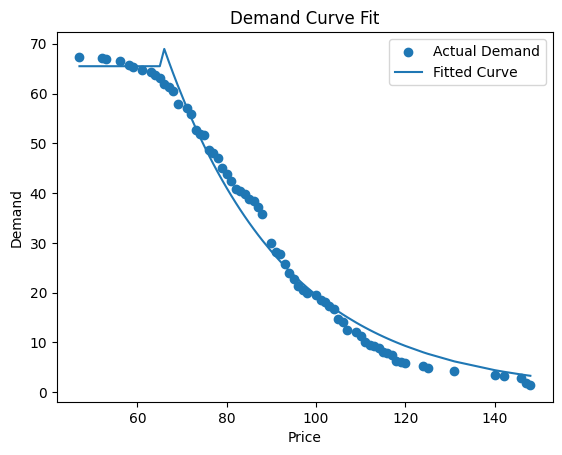

easter


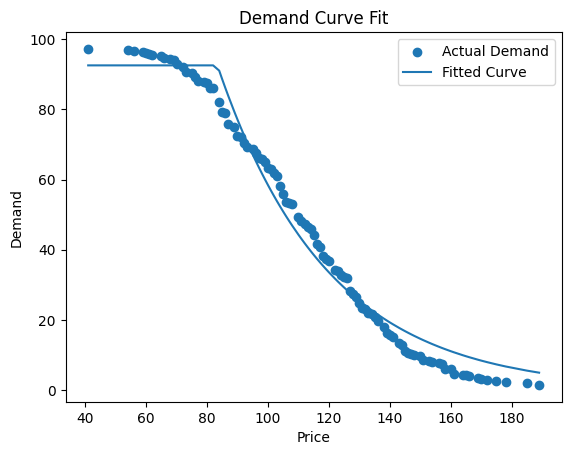

new_years


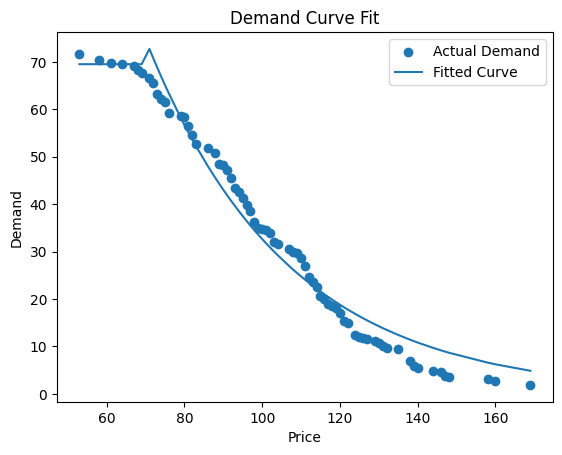

In [66]:
        
for day in unique_holidays: 
        print(day)
        data = merged_holidays[(merged_holidays.holiday == day)].reset_index()
        
        #remove outlier
        mean = data.adr.mean()
        std_dev = data.adr.std()
       

        # calculate z-scores
        data['z_scores'] = np.abs((data.adr - mean) / std_dev)
        
        #filter out outliers
        data = data[data.z_scores <=2]
        
        ## Fit Demand curve
        x_data = data['adr'].values
        y_data = data['expected_demand'].values
        
        initial_guess = [1, 0.01, 1, 1,data['rn_median'].values[0] ]
        bounds = ([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])

        # Fit the demand curve to the data
        params, _ = curve_fit(demand_curve, x_data, y_data, bounds=bounds, p0=initial_guess)
        
        
        # Extract the fitted parameters
        a_fit, b_fit, c_fit ,d_fit,max_demand= params
        
        #visually explore if the demand curve fits the data
        predicted_demand = demand_curve(x_data, a_fit, b_fit,c_fit,d_fit,max_demand)
        
        plt.scatter(x_data, y_data, label='Actual Demand')
        plt.plot(x_data, predicted_demand, label='Fitted Curve')
        plt.xlabel('Price')
        plt.ylabel('Demand')
        plt.legend()
        plt.title('Demand Curve Fit')
        plt.show()

In [67]:
holiday_results = pd.DataFrame(columns=['holiday', 'optimal_rate', 'expected_rn','expected_rev','optimal_rate_lim_inv'])

for day in unique_holidays:
        data = merged_holidays[(merged_holidays.holiday == day)].reset_index()
        
        #remove outlier
        mean = data.adr.mean()
        std_dev = data.adr.std()
       

        # calculate z-scores
        data['z_scores'] = np.abs((data.adr - mean) / std_dev)
        
        #filter out outliers
        data = data[data.z_scores <=2]
        
        ## Fit Demand curve
        x_data = data['adr'].values
        y_data = data['expected_demand'].values
        
        initial_guess = [1, 0.01, 1, 1,data['rn_median'].values[0] ]
        bounds = ([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])

        # Fit the demand curve to the data
        params, _ = curve_fit(demand_curve, x_data, y_data, bounds=bounds, p0=initial_guess)
        
        
        # Extract the fitted parameters
        a_fit, b_fit, c_fit ,d_fit,max_demand= params
        
        
        #optimze revenue
        objective = lambda price: -revenue(price)
        
        

        optimize = minimize_scalar(objective, bounds=(45, 400), method='bounded')
        optimal_price = optimize.x
        max_revenue = -optimize.fun
        
        expected_rns = demand_curve(optimal_price,a_fit, b_fit, c_fit ,d_fit,max_demand)
        
        optimal_rate_lim_inv = demand_to_price(50,a_fit,b_fit,c_fit,d_fit,max_demand)
        
        new_row = pd.DataFrame({'holiday':day,
                       'optimal_rate': optimal_price,
                       'expected_rev':max_revenue,
                       'expected_rn':expected_rns,
                       'optimal_rate_lim_inv':optimal_rate_lim_inv},index=[0])
        holiday_results = pd.concat([holiday_results, new_row], ignore_index=True)
        

C:\Users\AthPat\AppData\Local\Temp\ipykernel_8160\1277044988.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  holiday_results = pd.concat([holiday_results, new_row], ignore_index=True)


In [68]:
holiday_results

,holiday,optimal_rate,expected_rn,expected_rev,optimal_rate_lim_inv
0,christmas,65.493222,70.278616,4602.772998,74.656916
1,easter,83.409646,92.565506,7720.856134,105.636702
2,new_years,69.514607,75.781642,5267.931022,84.569841


Now, we have also calculated the optimal price for our key holidays.

# Final words

Those with access to a sophisticated revenue management system will now be able to better interact with your system and build system trust with your key stakeholders.

For those without a revenue management system, you can use this model to start making better pricing decisions. I have used a similar pricing model for a few hotels that did not have a fully capable revenue management system and also to optimize premium room pricing - that could be a topic for another notebook.
